# Imports

In [2]:
# regular libraries
import numpy as np
import pandas as pd
import scipy.stats
import json

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler

# sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier

# sklearn.model_selection
from sklearn.model_selection import train_test_split as tts, GridSearchCV

# sklearn.metrics
from sklearn.metrics import accuracy_score, plot_confusion_matrix, roc_auc_score, roc_curve, plot_roc_curve, classification_report

# sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# sklearn.svm
from sklearn.svm import SVC

# sklearn.linear_models
from sklearn.linear_model import LogisticRegression

# sklearn.utils
from sklearn.utils import resample

# pandas future warning
import warnings

# sweetviz for autoeda test
import sweetviz as sv

#### Suppress Warnings

In [3]:
warnings.simplefilter(action='ignore', category=FutureWarning)

#### Seaborn settings

In [4]:
sns.set_style('darkgrid')
sns.set_palette('muted')

# Importing data

In [5]:
df = pd.read_csv('hr_data/aug_train.csv')

In [6]:
print("Dataframe has {} rows and {} columns.".format(df.shape[0], df.shape[1]))

Dataframe has 19158 rows and 14 columns.


In [7]:
df.head(10)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
5,21651,city_176,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11,NaN,NaN,1,24,1.0
6,28806,city_160,0.920,Male,Has relevent experience,no_enrollment,High School,NaN,5,50-99,Funded Startup,1,24,0.0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0
9,699,city_103,0.920,NaN,Has relevent experience,no_enrollment,Graduate,STEM,17,10000+,Pvt Ltd,>4,123,0.0


In [8]:
df.target.value_counts()

0.0    14381
1.0     4777
Name: target, dtype: int64

# Statistics and informations about data

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [10]:
df.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


# Utility Functions

In [11]:
def column_info(dataframe_col, countplot=True, value_counts=True, missing=True, statistical_info=True):
    """
    dataframe_col -> pandas.DataFrame.column_name
    Prints out the information about given column.
    """
    if countplot:
        sns.countplot(dataframe_col)
        plt.title('Value counts of given column')
    if value_counts:
        print("Value counts")
        print("-------------")
        print(dataframe_col.value_counts())
        print("-------------")
    if missing:
        print("Missing values")
        print("---------------")
        print("The percent of missing values: %0.1f%%" % (dataframe_col.isnull().sum() * 100 / len(dataframe_col)))
        print("Total missing values:", dataframe_col.isnull().sum())
        print("-------------")
    if statistical_info:
        print("Statistical info")
        print("----------------")
        print(dataframe_col.describe())
        print("----------------")

In [12]:
def vis_missing(dataframe, bar=True, dendrogram=True, matrix=True, heatmap=True):
    """
    Title says all.
    """
    if bar:
        msno.bar(dataframe)
        plt.title("Missing values (bar)")
    if dendrogram:
        msno.dendrogram(dataframe)
        plt.title("Missing values (dendrogram)")
    if matrix:
        msno.matrix(dataframe)
        plt.title("Missing values (matrix)")
    if heatmap:
        msno.heatmap(dataframe)
        plt.title("Missing values (heatmap)")

In [13]:
def missing_by_row(dataframe, threshold=4, drop=False, info=True):
    """
    dataframe -> pandas DataFrame object
    threshold -> integer
    drop, info -> boolean

    If info equals to true, prints out the missing values in one row.
    If drop equals to true, drops the rows that has more null values than threshold.

    """
    arr = []
    for row_idx in range(len(dataframe)):
        arr.append(dataframe.iloc[row_idx, :].isnull().sum())


    if info:
        print('Max missing values in row:', max(arr))
        print('Min missing values in row', min(arr))
        print('Mean of missing values in all rows:', sum(arr)/len(arr))

    if drop:
        sumRow = 0
        dropRows = []
        for row_idx in range(len(dataframe)):
            if dataframe.iloc[row_idx, :].isnull().sum() >= threshold:
                dropRows.append(row_idx)
                sumRow += 1

        dataframe.drop(dataframe.index[dropRows], inplace=True)

        print("{} rows dropped.".format(sumRow))
        print("Shape after dropping rows: ", dataframe.shape)

In [14]:
def null_info(dataframe, dataframe_col, target_col):
    """
    dataframe -> pandas DataFrame object
    dataframe_col -> string
    target_col -> string

    Prints out target values of missing datas.
    """
    arr = []
    temp_df = dataframe[[dataframe_col, target_col]]
    condition = dataframe[dataframe_col].isna()
    temp_df = temp_df[condition]
    tvc = temp_df[target_col].value_counts()
    print(tvc)

# Basic visualizations in order to gain first insight

###### Sweetviz AutoEDA


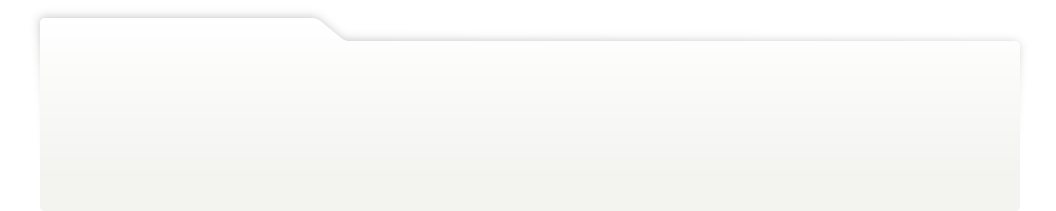
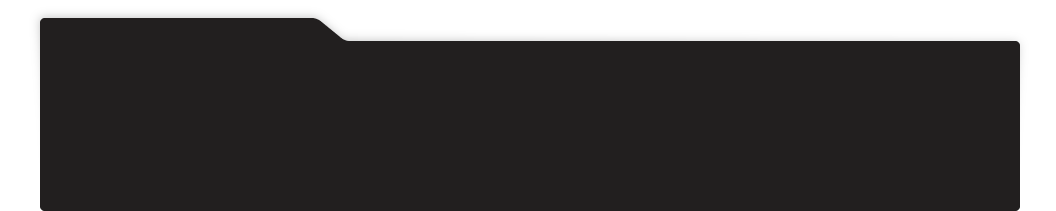
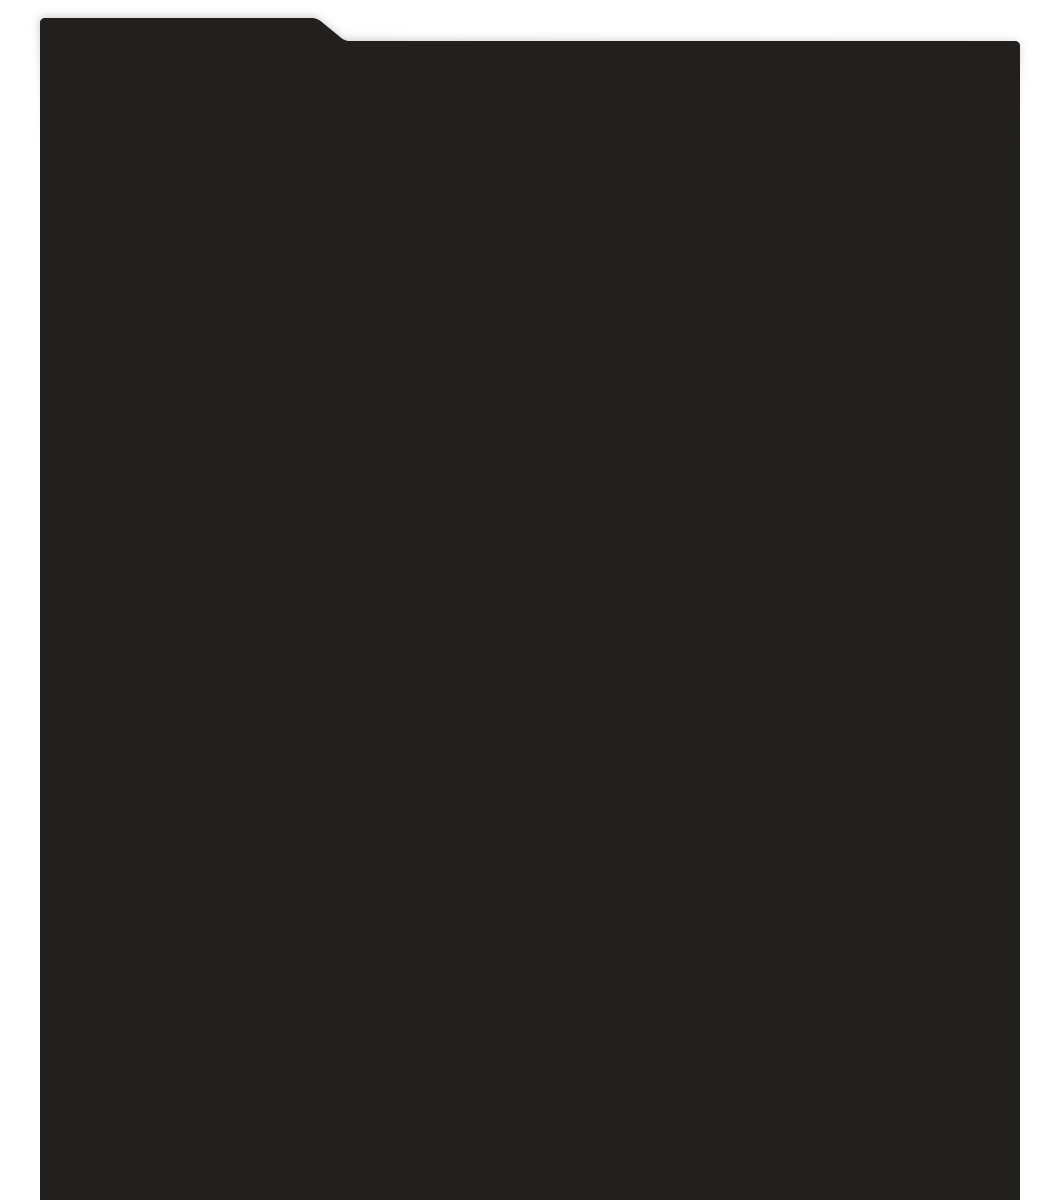
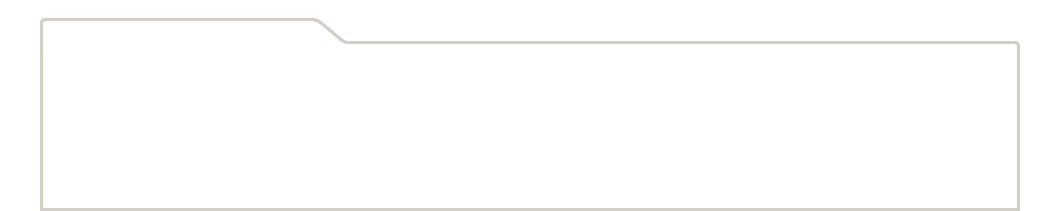
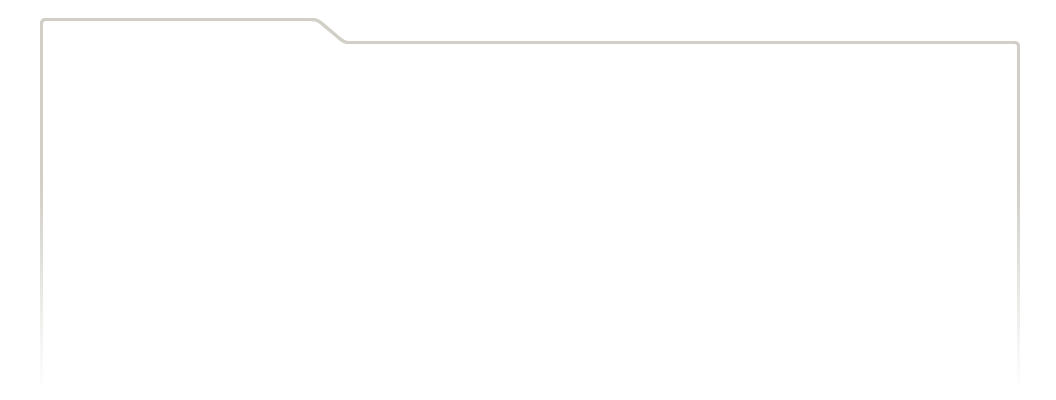
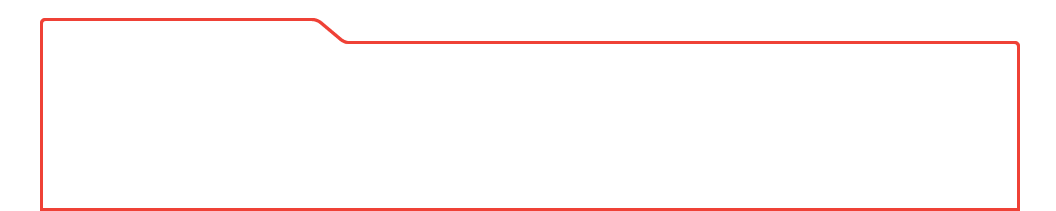
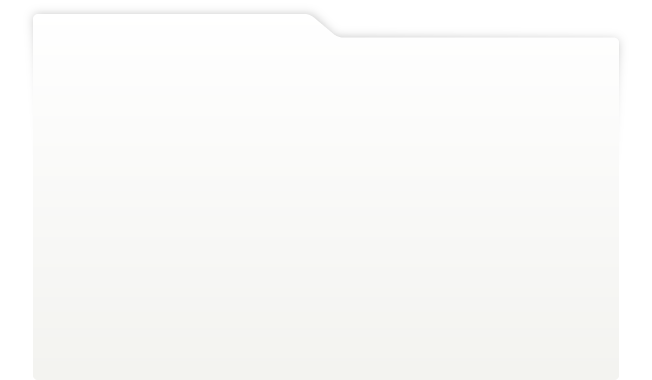
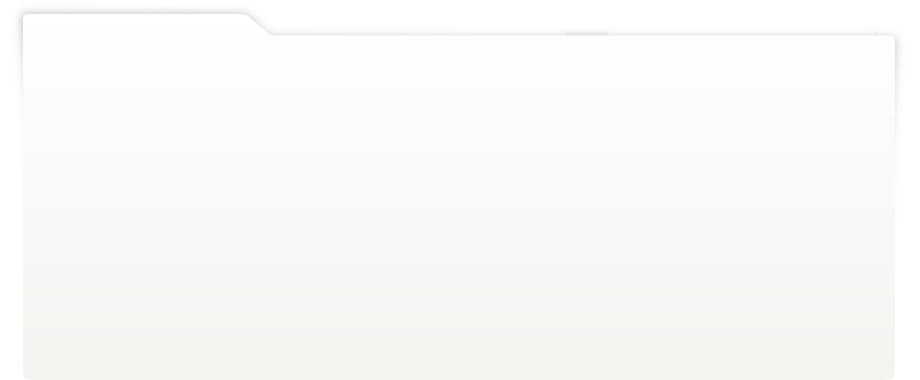
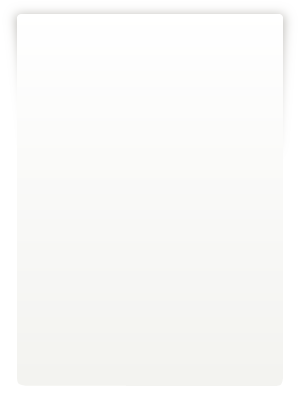
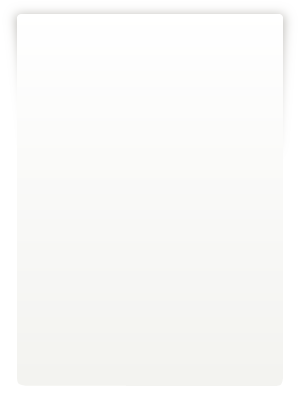
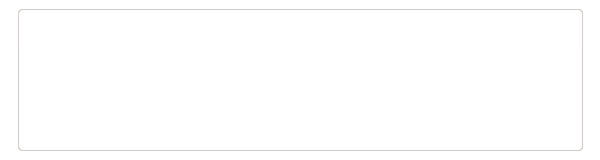
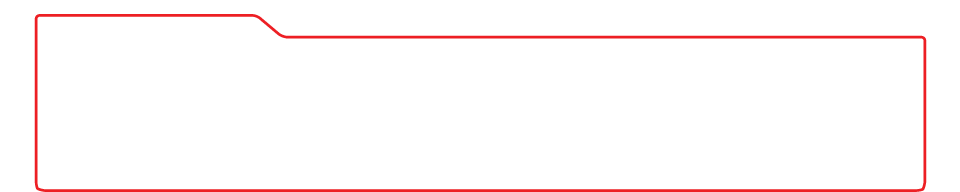
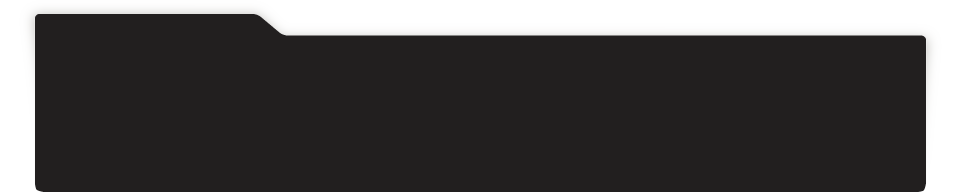
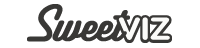
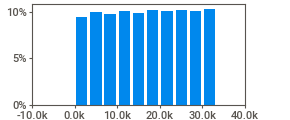
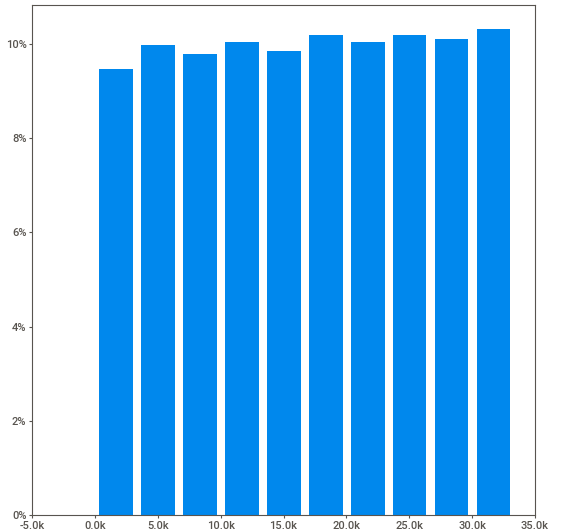
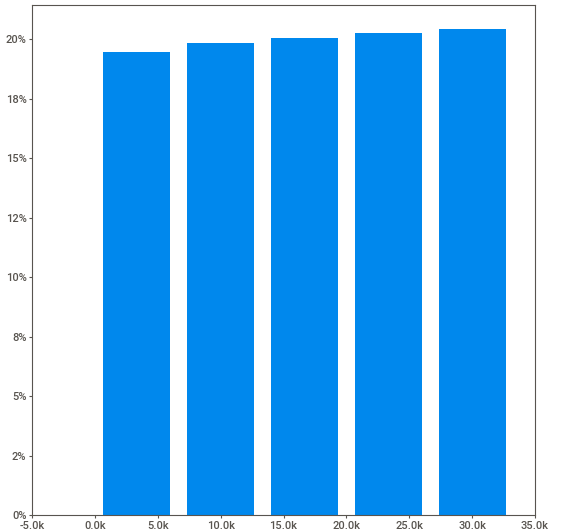
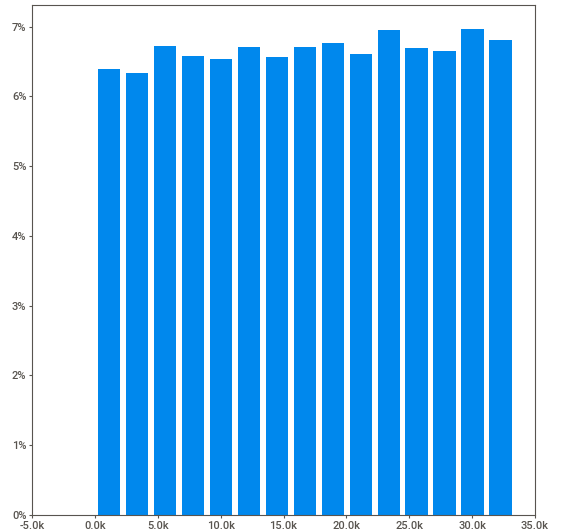
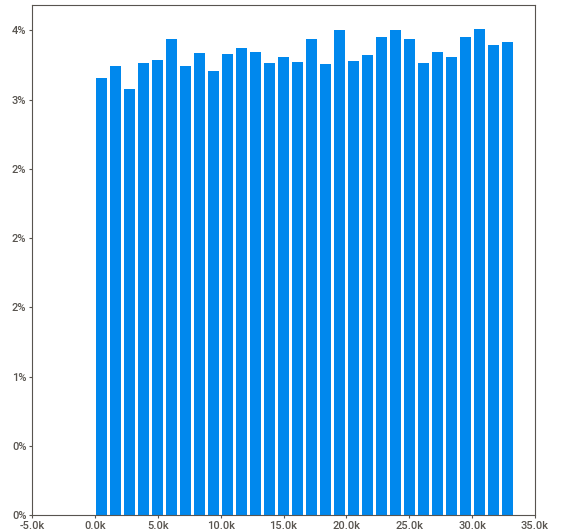
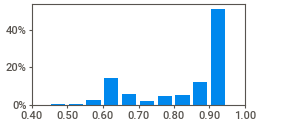
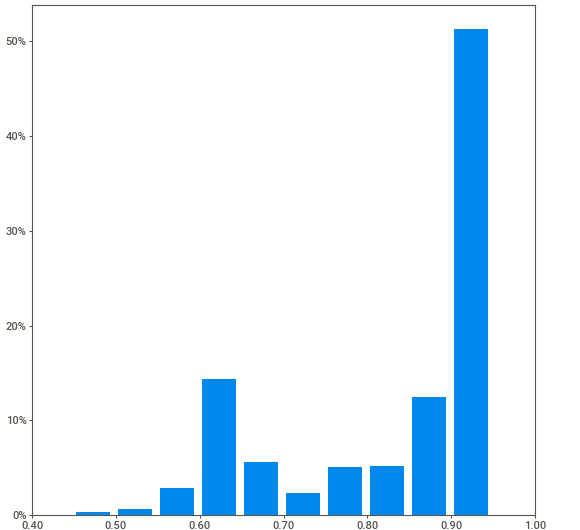
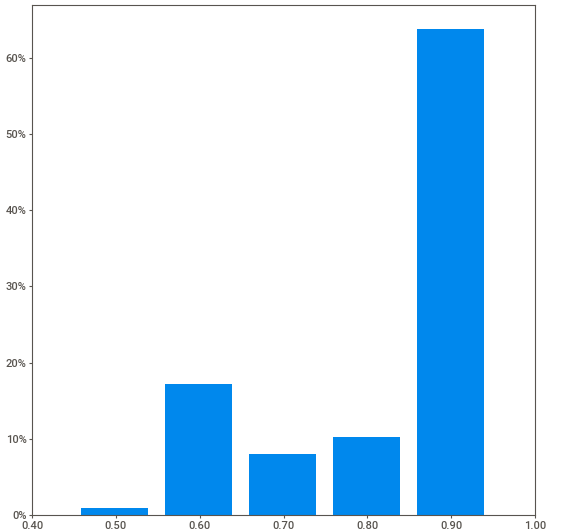
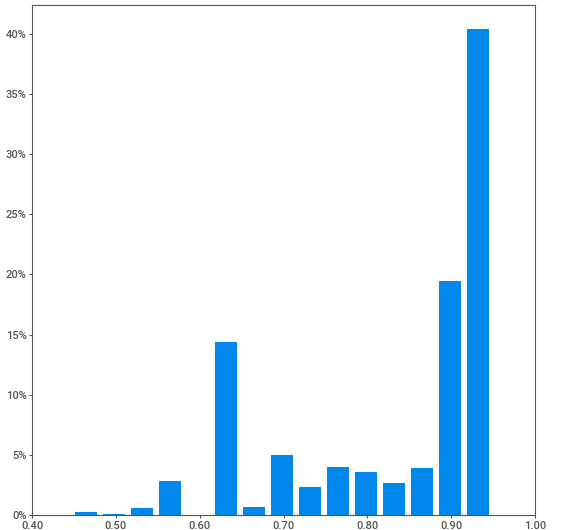
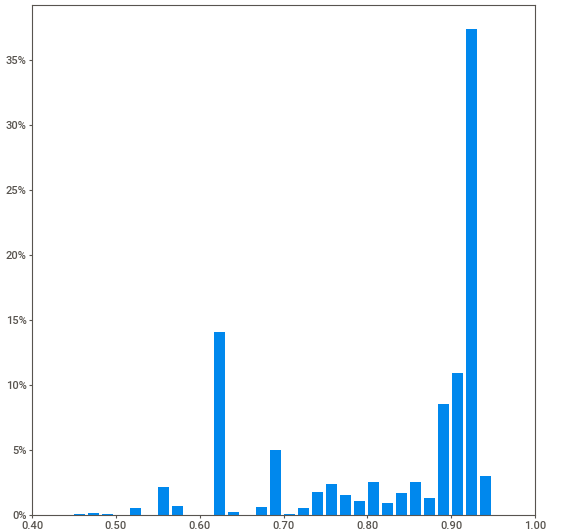
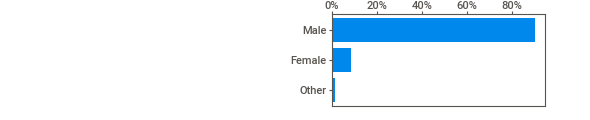
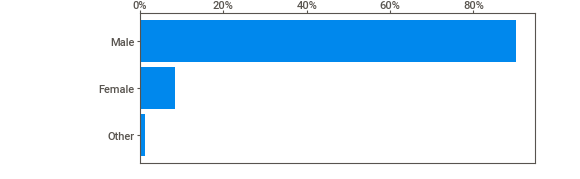
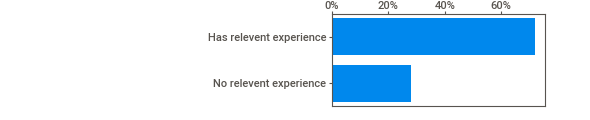
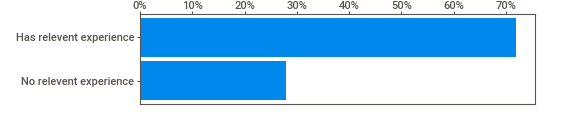
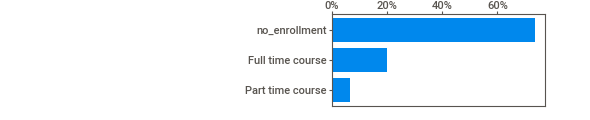
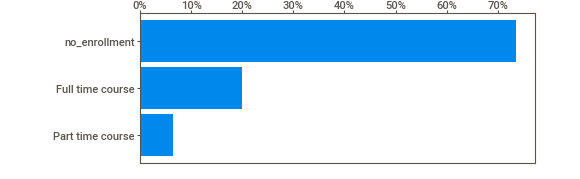
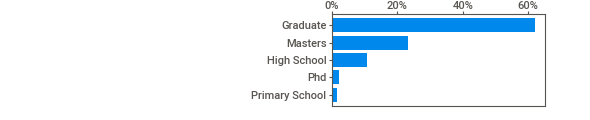
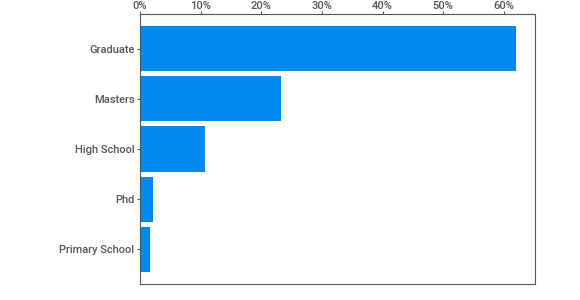
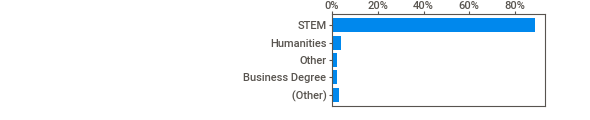
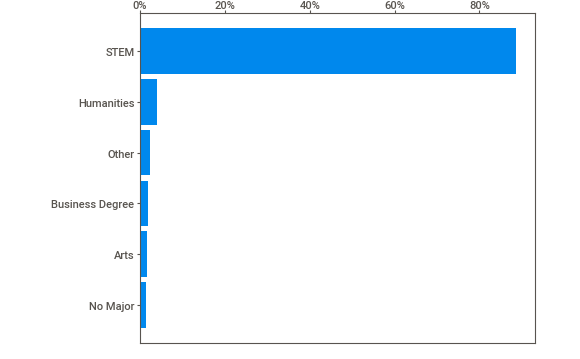
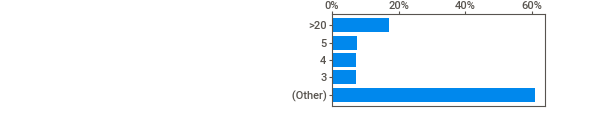
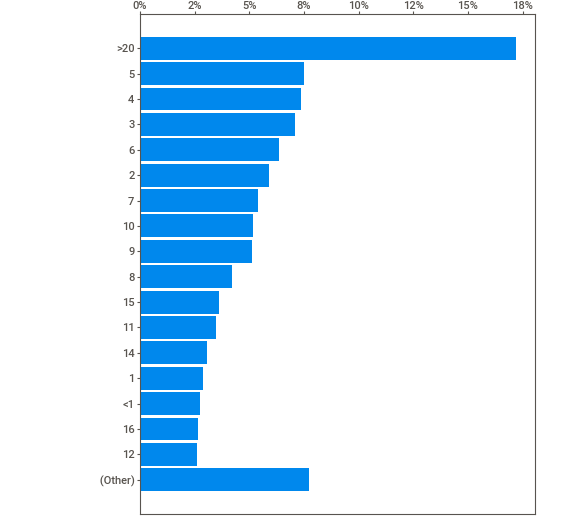
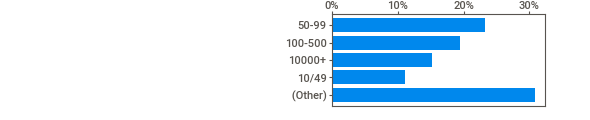
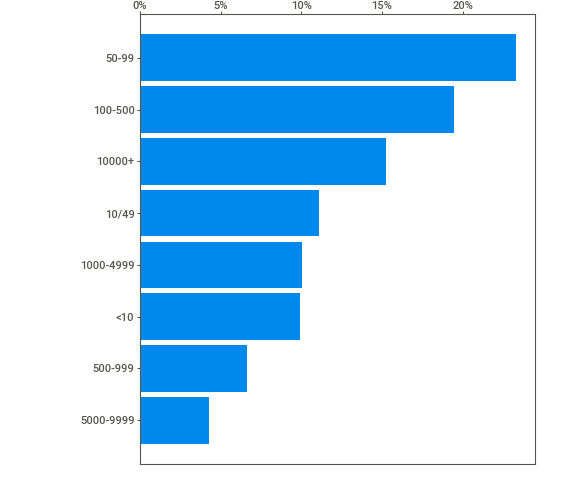
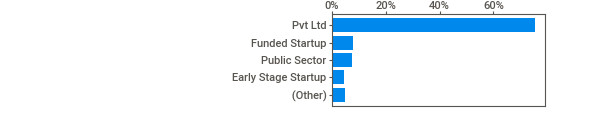
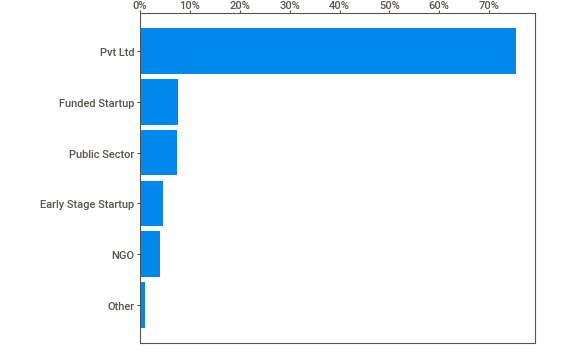
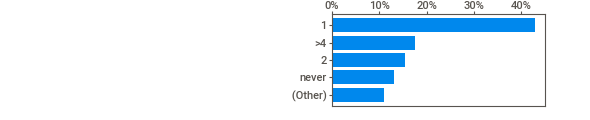
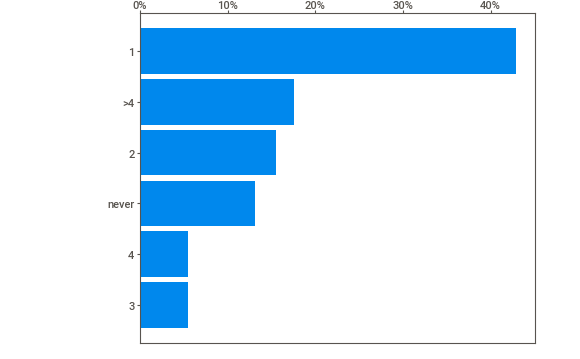
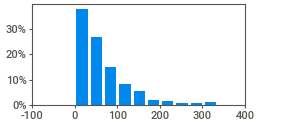
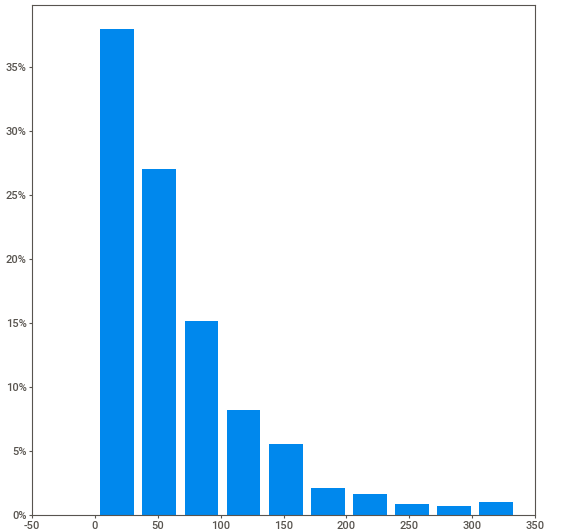
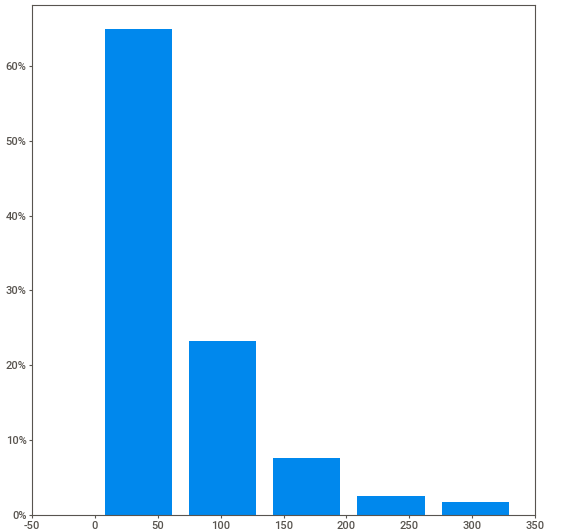
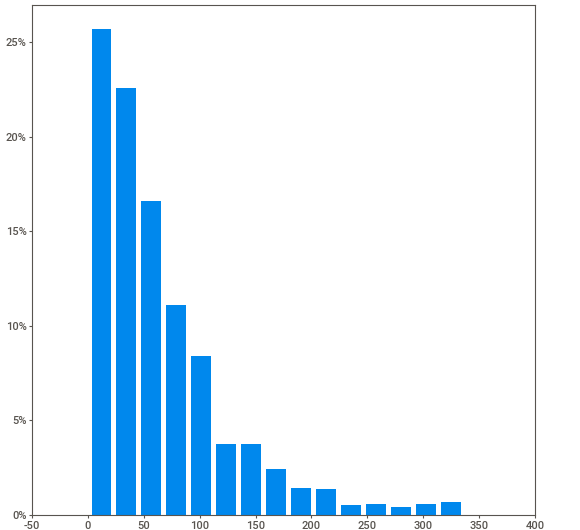
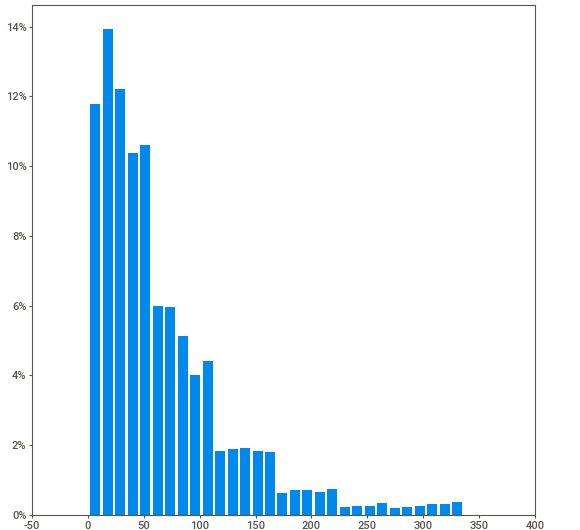
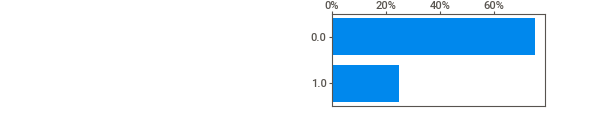
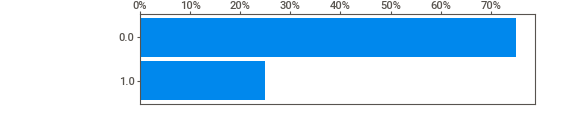
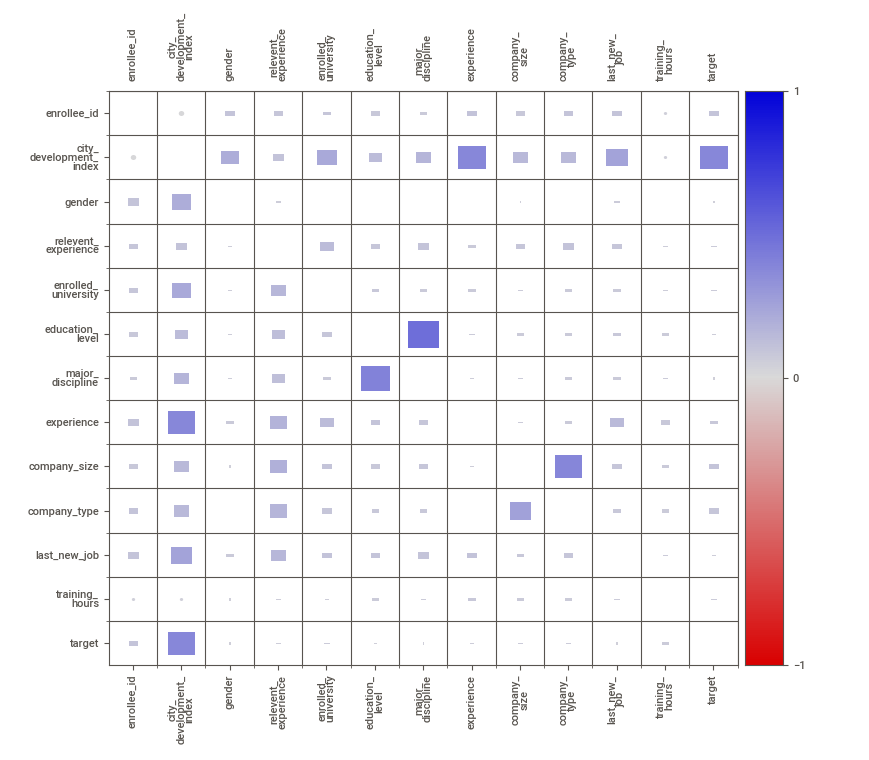
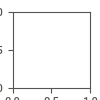

In [15]:
report = sv.analyze(df)
report.show_notebook(layout='widescreen', scale=0.8)

##### Target vs Gender

<AxesSubplot:xlabel='target', ylabel='count'>

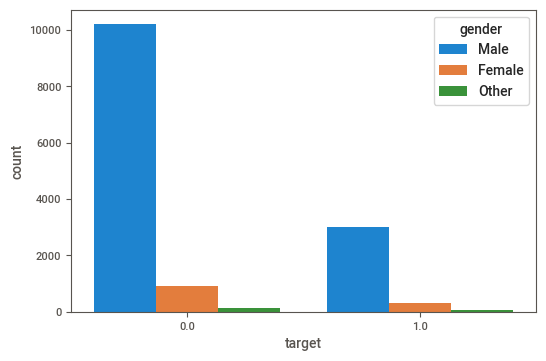

In [16]:
sns.countplot(df.target, hue=df.gender)

##### Gender count

<AxesSubplot:xlabel='gender', ylabel='count'>

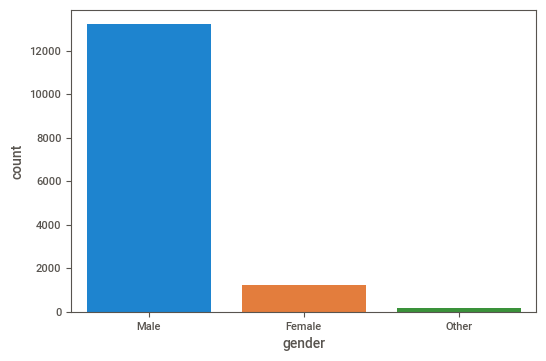

In [17]:
sns.countplot(df.gender)

##### Education Level of Genders

[Text(0, 0, 'Graduate'),
 Text(1, 0, 'Masters'),
 Text(2, 0, 'High School'),
 Text(3, 0, 'Phd'),
 Text(4, 0, 'Primary School')]

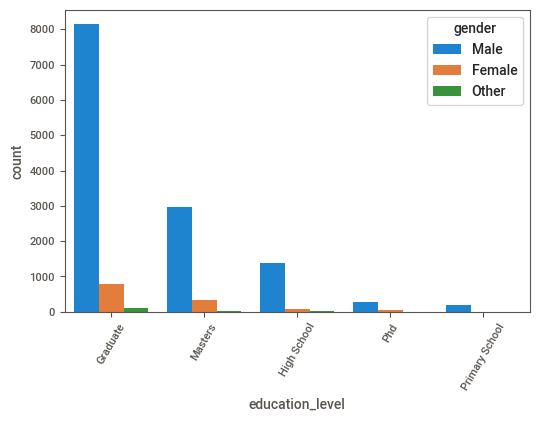

In [18]:
g = sns.countplot(df.education_level, hue=df.gender)
g.set_xticklabels(g.get_xticklabels(), rotation=60)

##### Majors by Gender

[Text(0, 0, 'STEM'),
 Text(1, 0, 'Business Degree'),
 Text(2, 0, 'Arts'),
 Text(3, 0, 'Humanities'),
 Text(4, 0, 'No Major'),
 Text(5, 0, 'Other')]

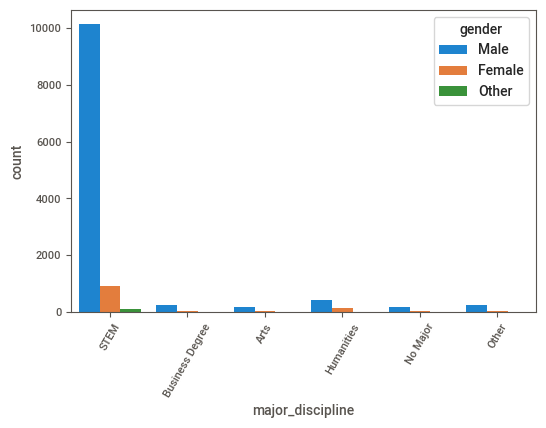

In [19]:
g = sns.countplot(df.major_discipline, hue=df.gender)
g.set_xticklabels(g.get_xticklabels(), rotation=60)

##### Majors by education level

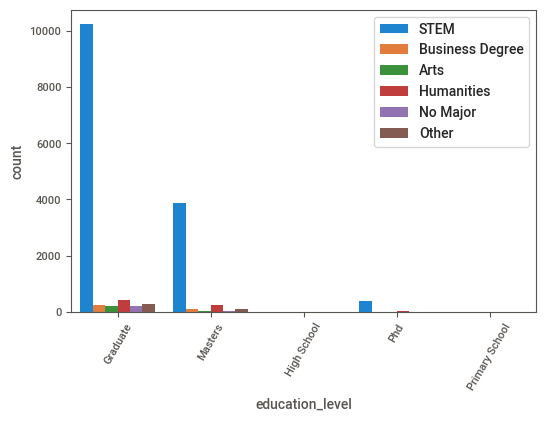

In [20]:
g = sns.countplot(data=df,
              x='education_level',
              hue='major_discipline')
g.set_xticklabels(g.get_xticklabels(), rotation=60)
plt.legend(loc='upper right')

##### City development index of genders by target

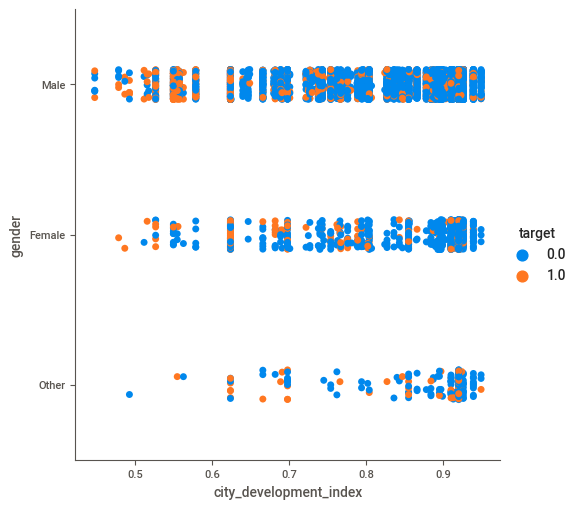

In [21]:
sns.catplot(data=df, x='city_development_index', y='gender', hue='target')

##### Time after last job change by education level

<AxesSubplot:xlabel='last_new_job', ylabel='count'>

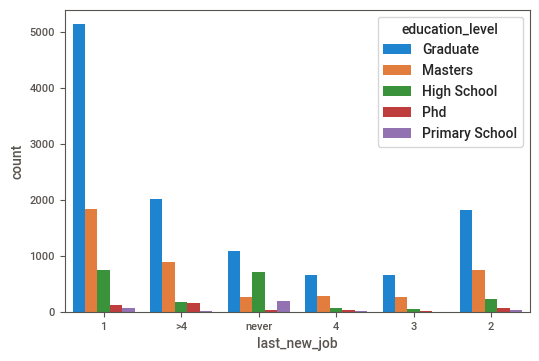

In [22]:
sns.countplot(data=df, 
              x='last_new_job',
              hue='education_level')

##### Company types by company sizes

[Text(0, 0, 'Pvt Ltd'),
 Text(1, 0, 'Funded Startup'),
 Text(2, 0, 'Early Stage Startup'),
 Text(3, 0, 'Other'),
 Text(4, 0, 'Public Sector'),
 Text(5, 0, 'NGO')]

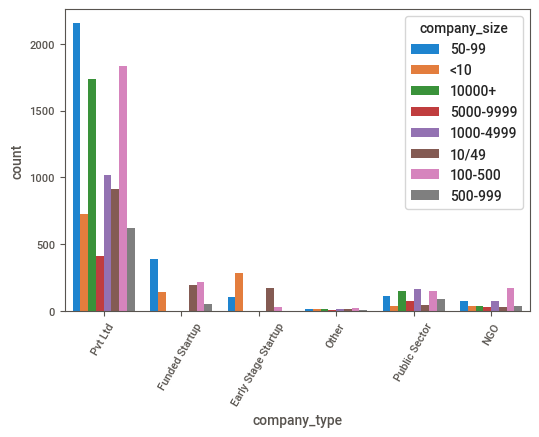

In [23]:
g = sns.countplot(data=df, 
              x='company_type',
              hue='company_size')
g.set_xticklabels(g.get_xticklabels(), rotation=60)

##### City development index boxplot

<AxesSubplot:xlabel='city_development_index'>

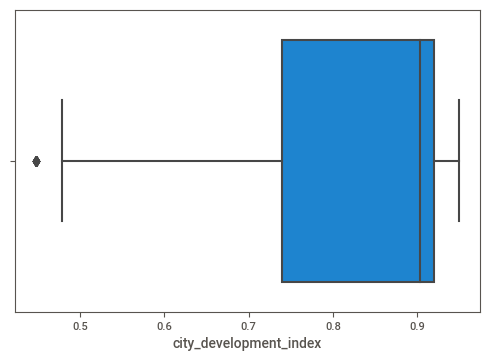

In [24]:
sns.boxplot(x=df.city_development_index)

##### City development index of target

<AxesSubplot:xlabel='target', ylabel='city_development_index'>

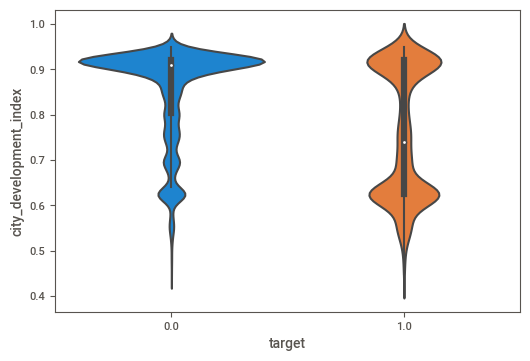

In [25]:
sns.violinplot(data=df, x='target', y='city_development_index')

# Observing Missing Values

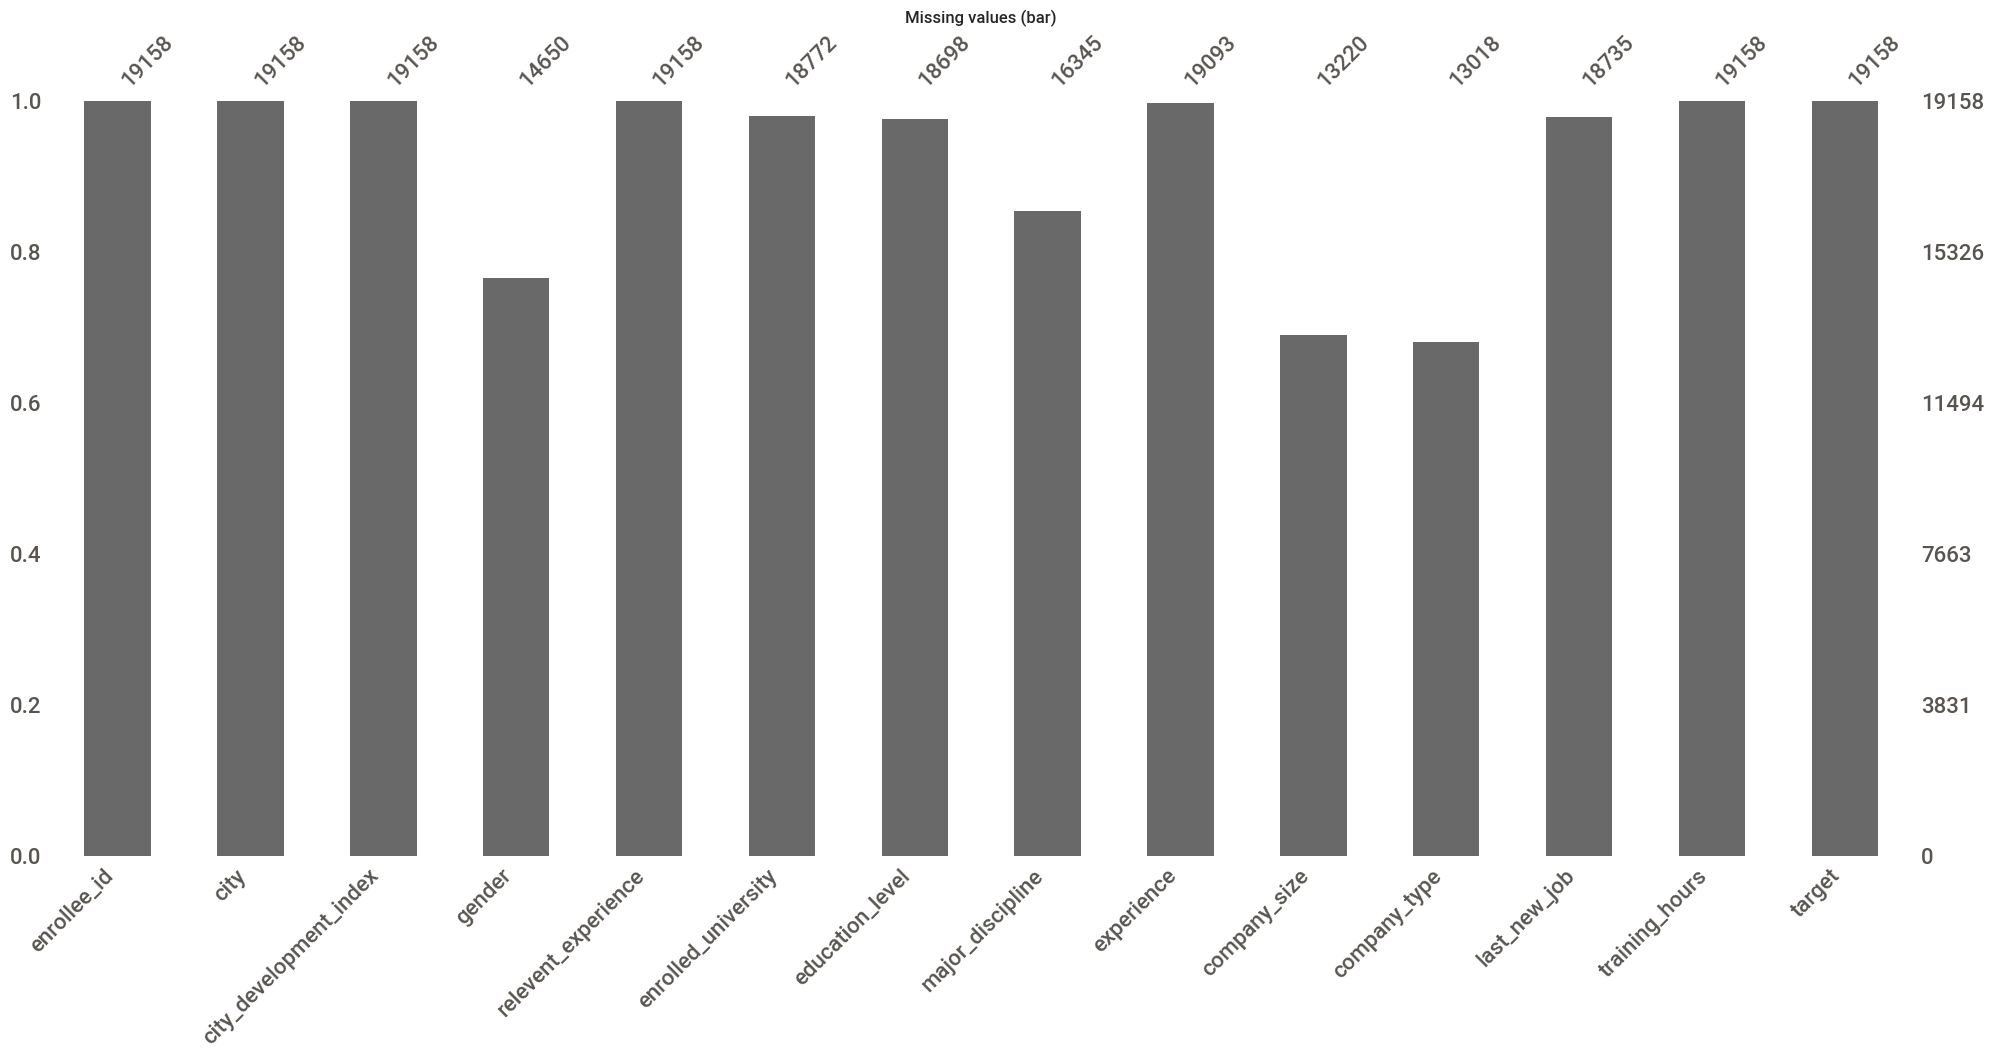

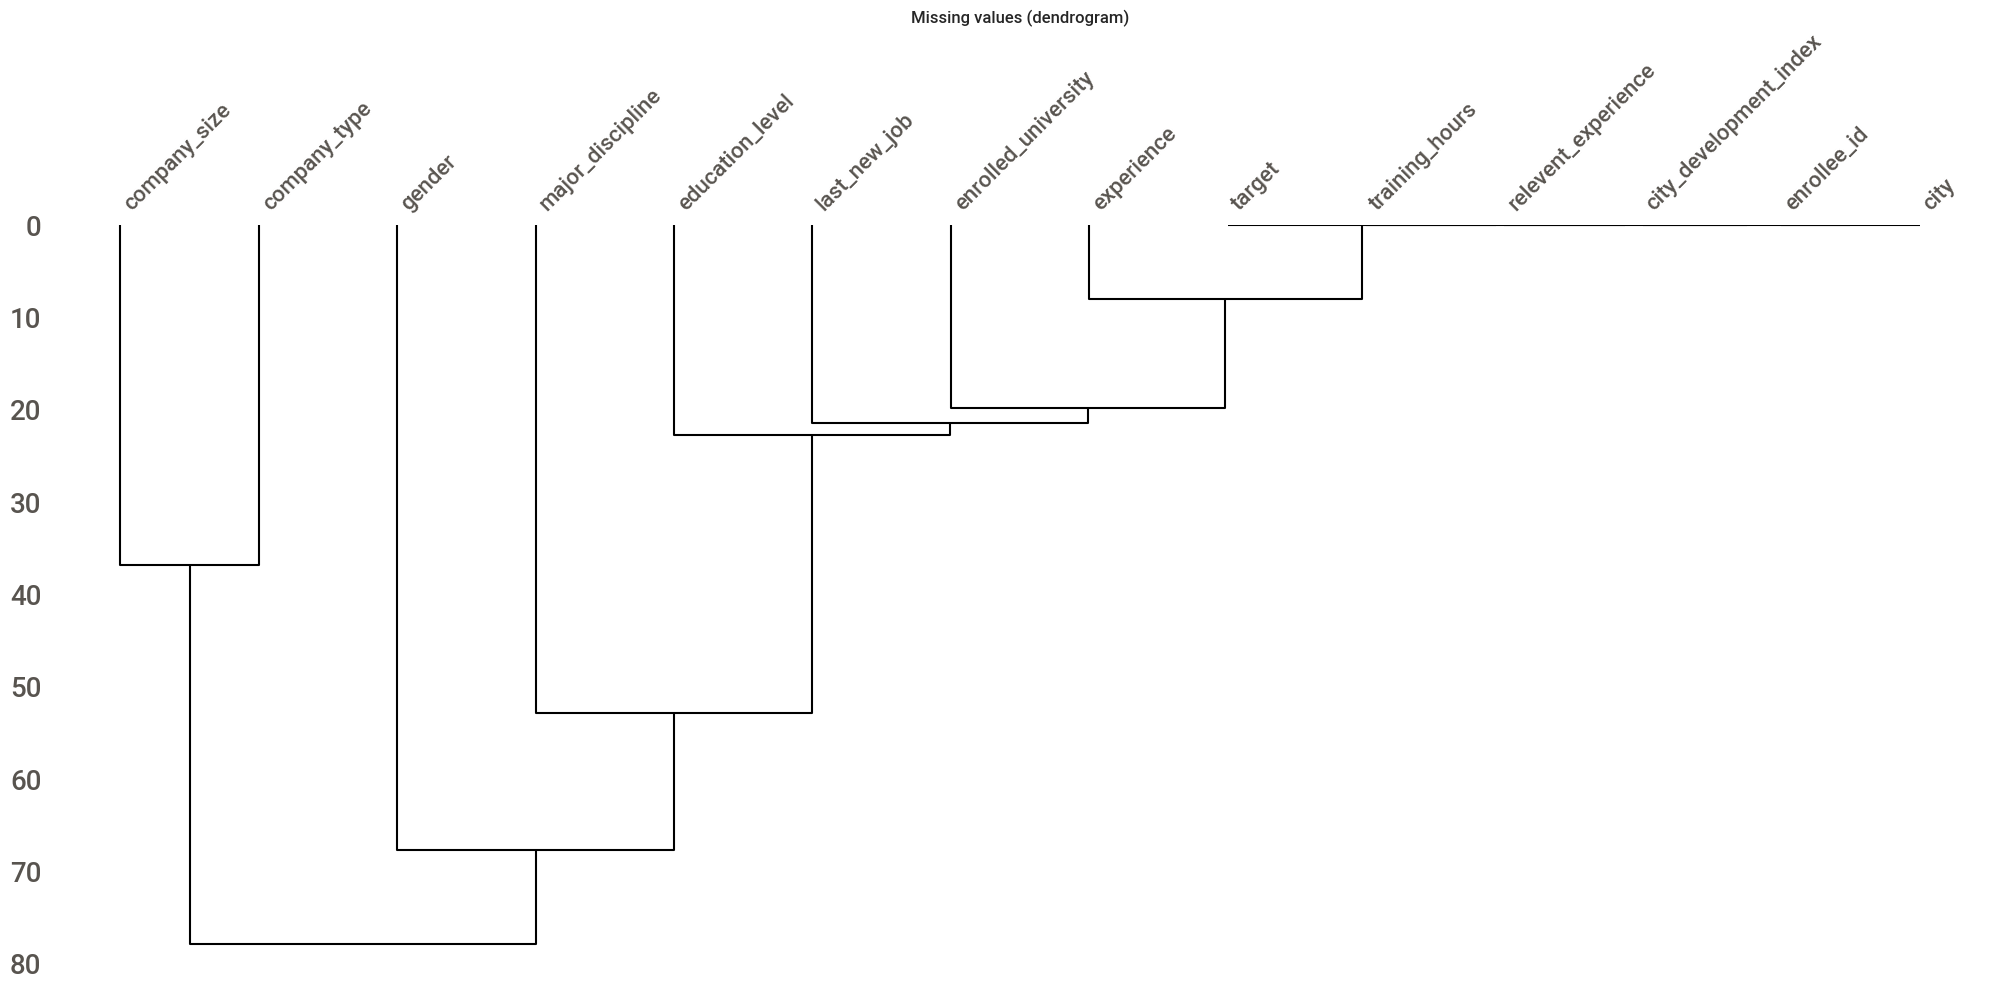

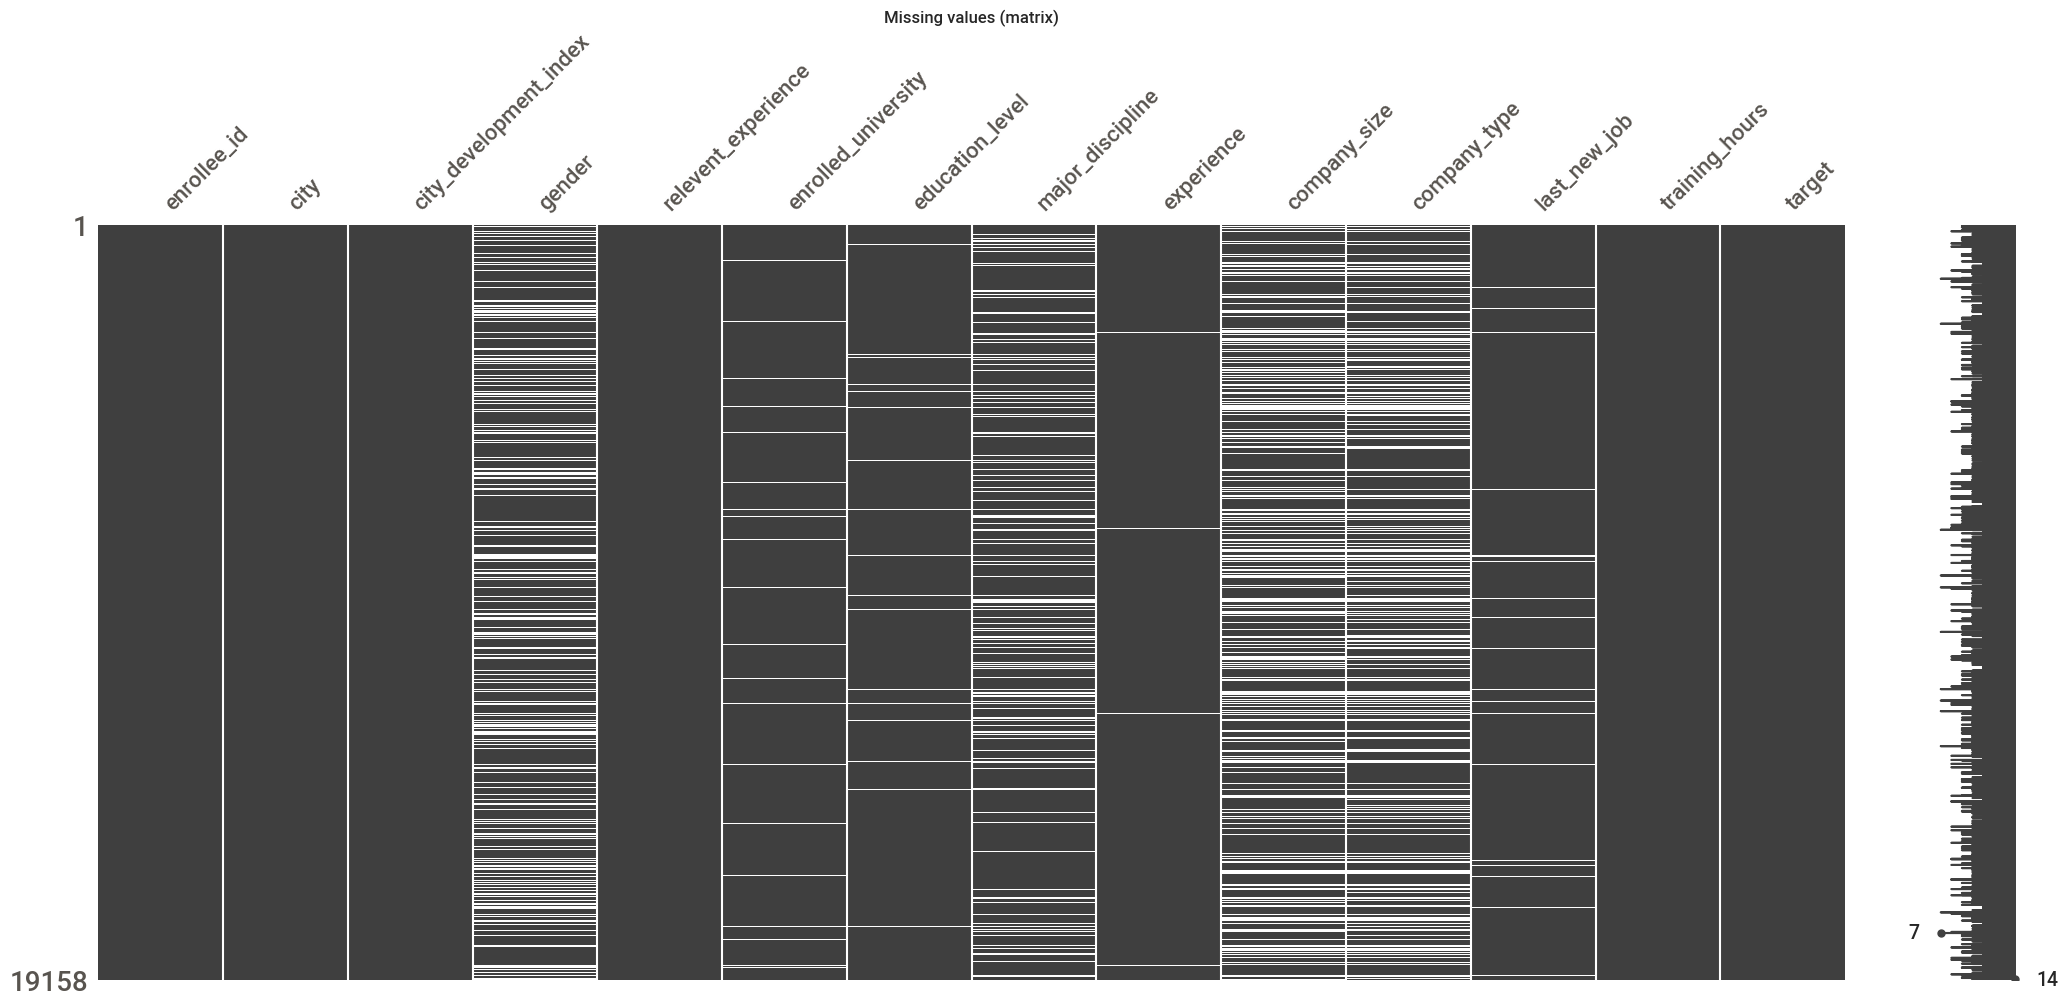

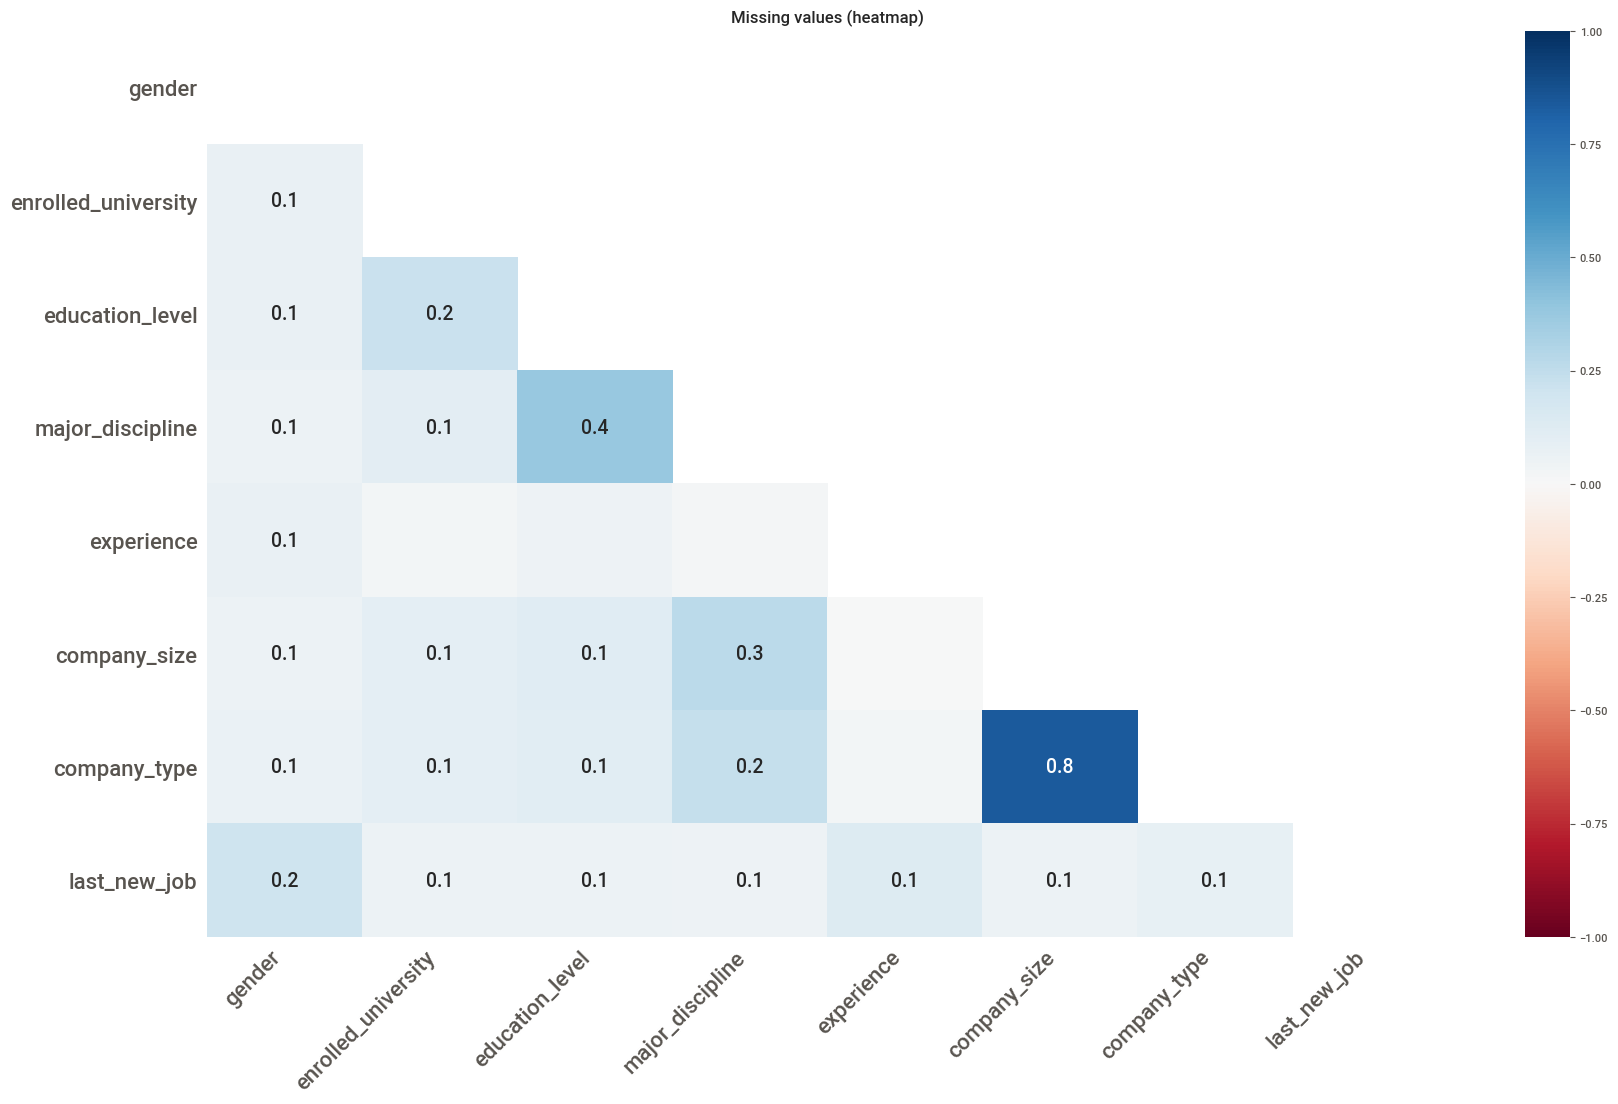

In [26]:
vis_missing(df)

# Dealing with missing values

### Drop rows that has more missing values than threshold

In [27]:
tvc = df.target.value_counts()
print(tvc)
print(tvc[0]-tvc[1])

0.0    14381
1.0     4777
Name: target, dtype: int64
9604


In [28]:
DROP_THRESHOLD = 4
df.shape

(19158, 14)

In [29]:
missing_by_row(df, threshold=DROP_THRESHOLD, drop=False, info=True)

Max missing values in row: 7
Min missing values in row 0
Mean of missing values in all rows: 1.0822110867522705


In [30]:
missing_by_row(df, threshold=DROP_THRESHOLD, drop=True, info=False)

878 rows dropped.
Shape after dropping rows:  (18280, 14)


In [31]:
tvc = df.target.value_counts()
print(tvc)
print(tvc[0]-tvc[1])

0.0    13762
1.0     4518
Name: target, dtype: int64
9244


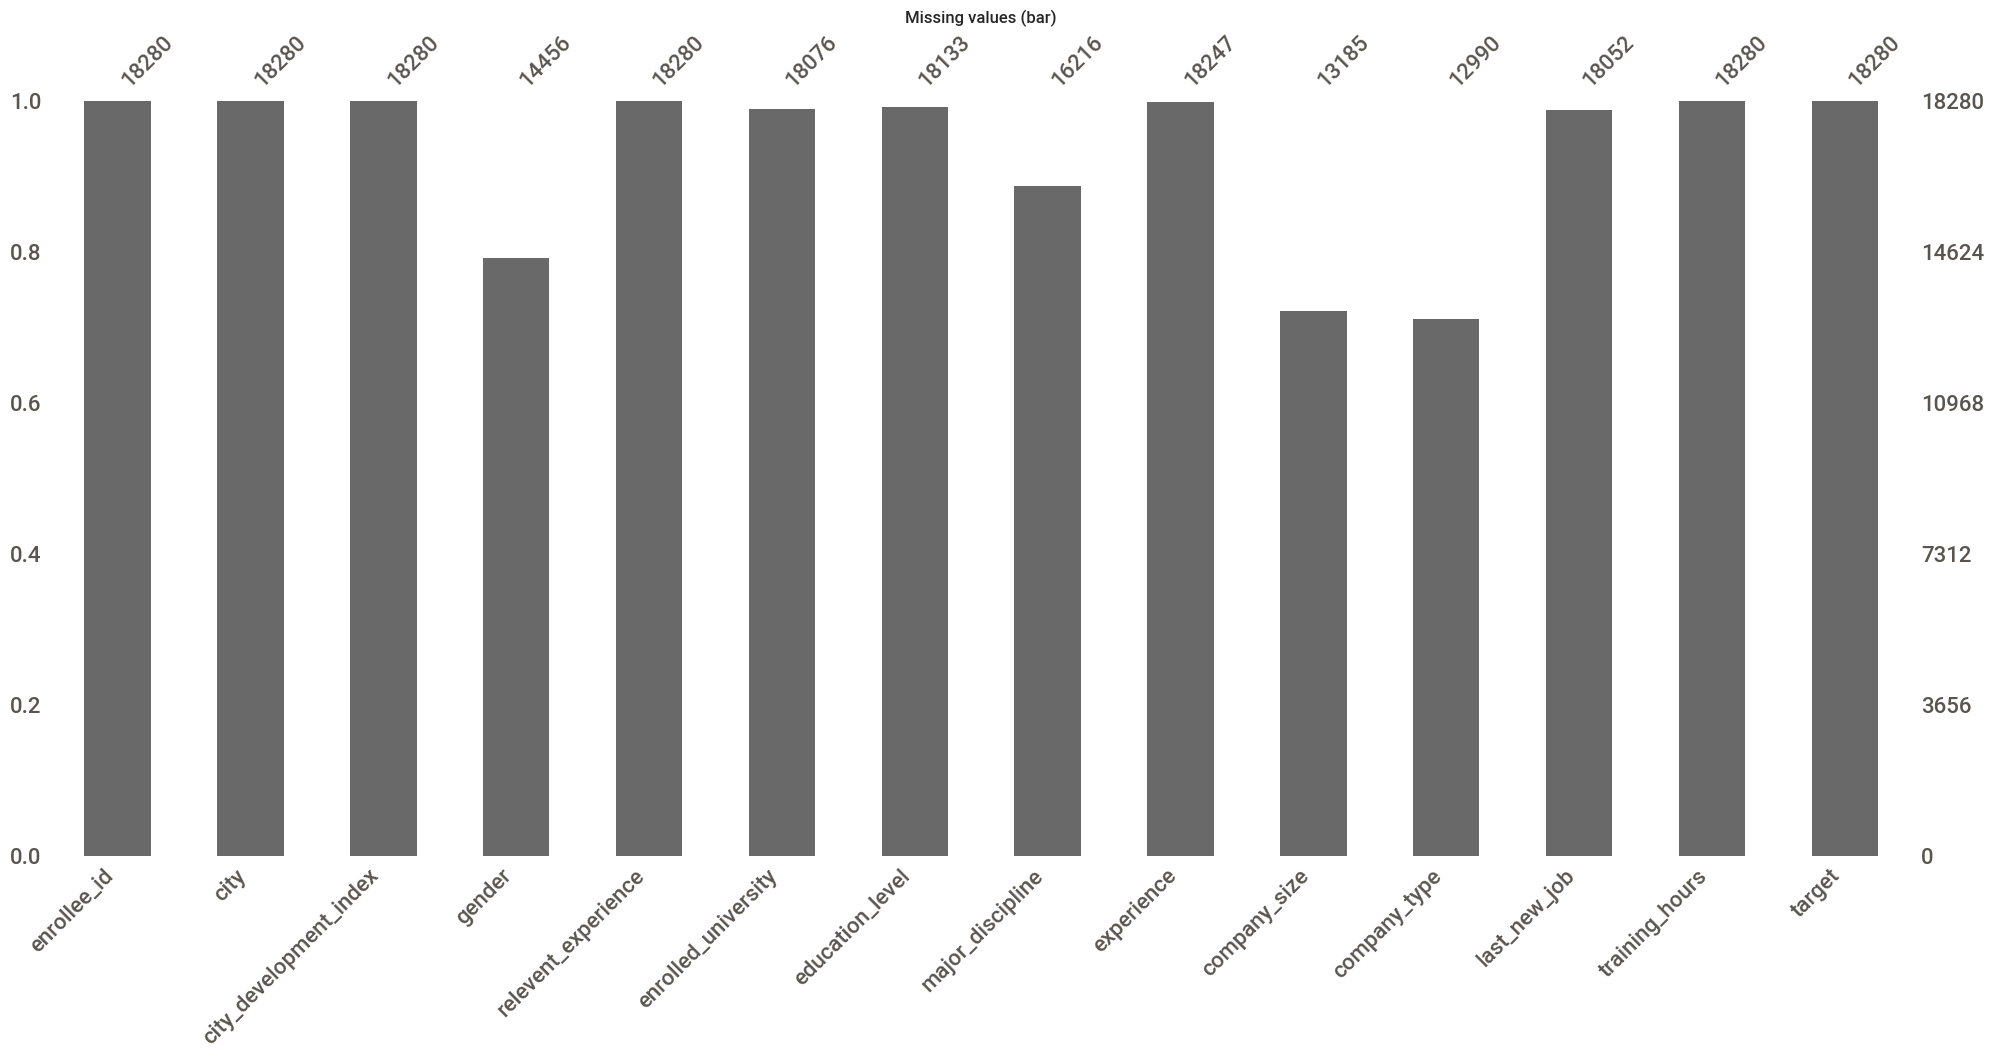

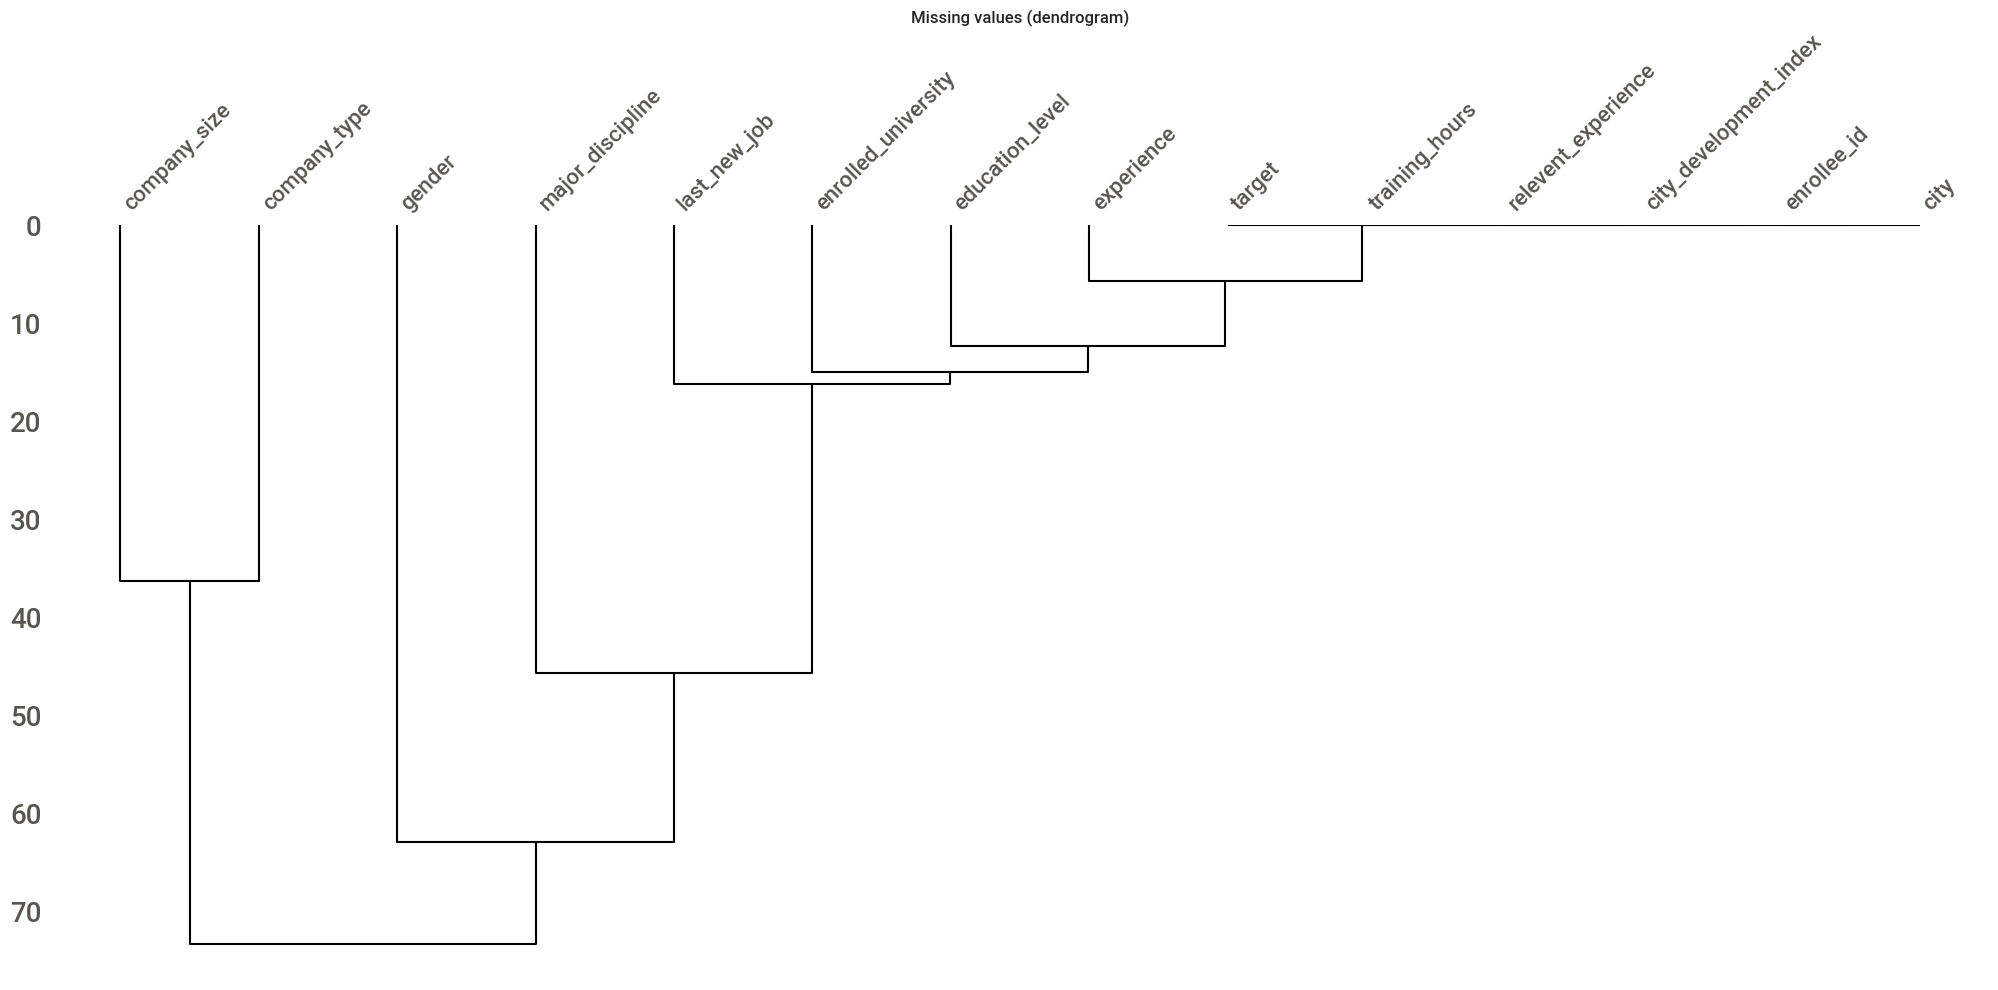

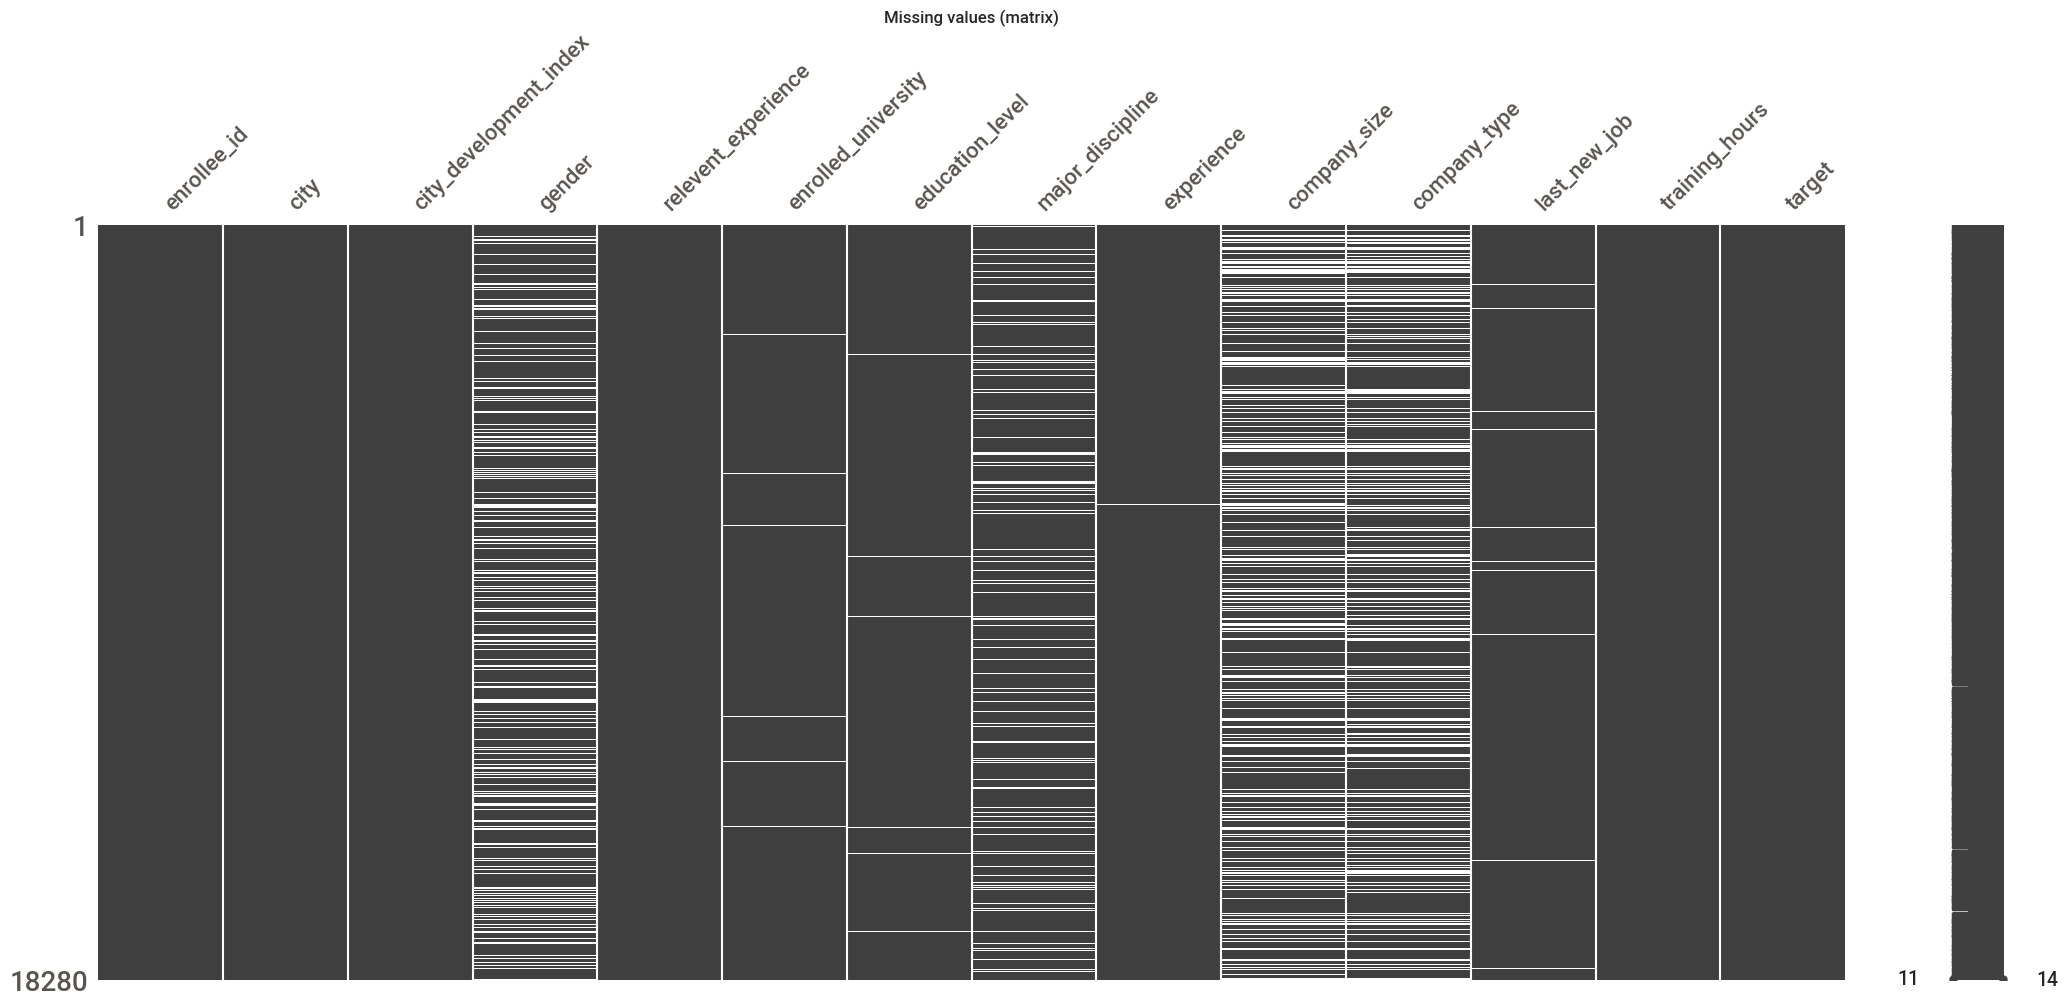

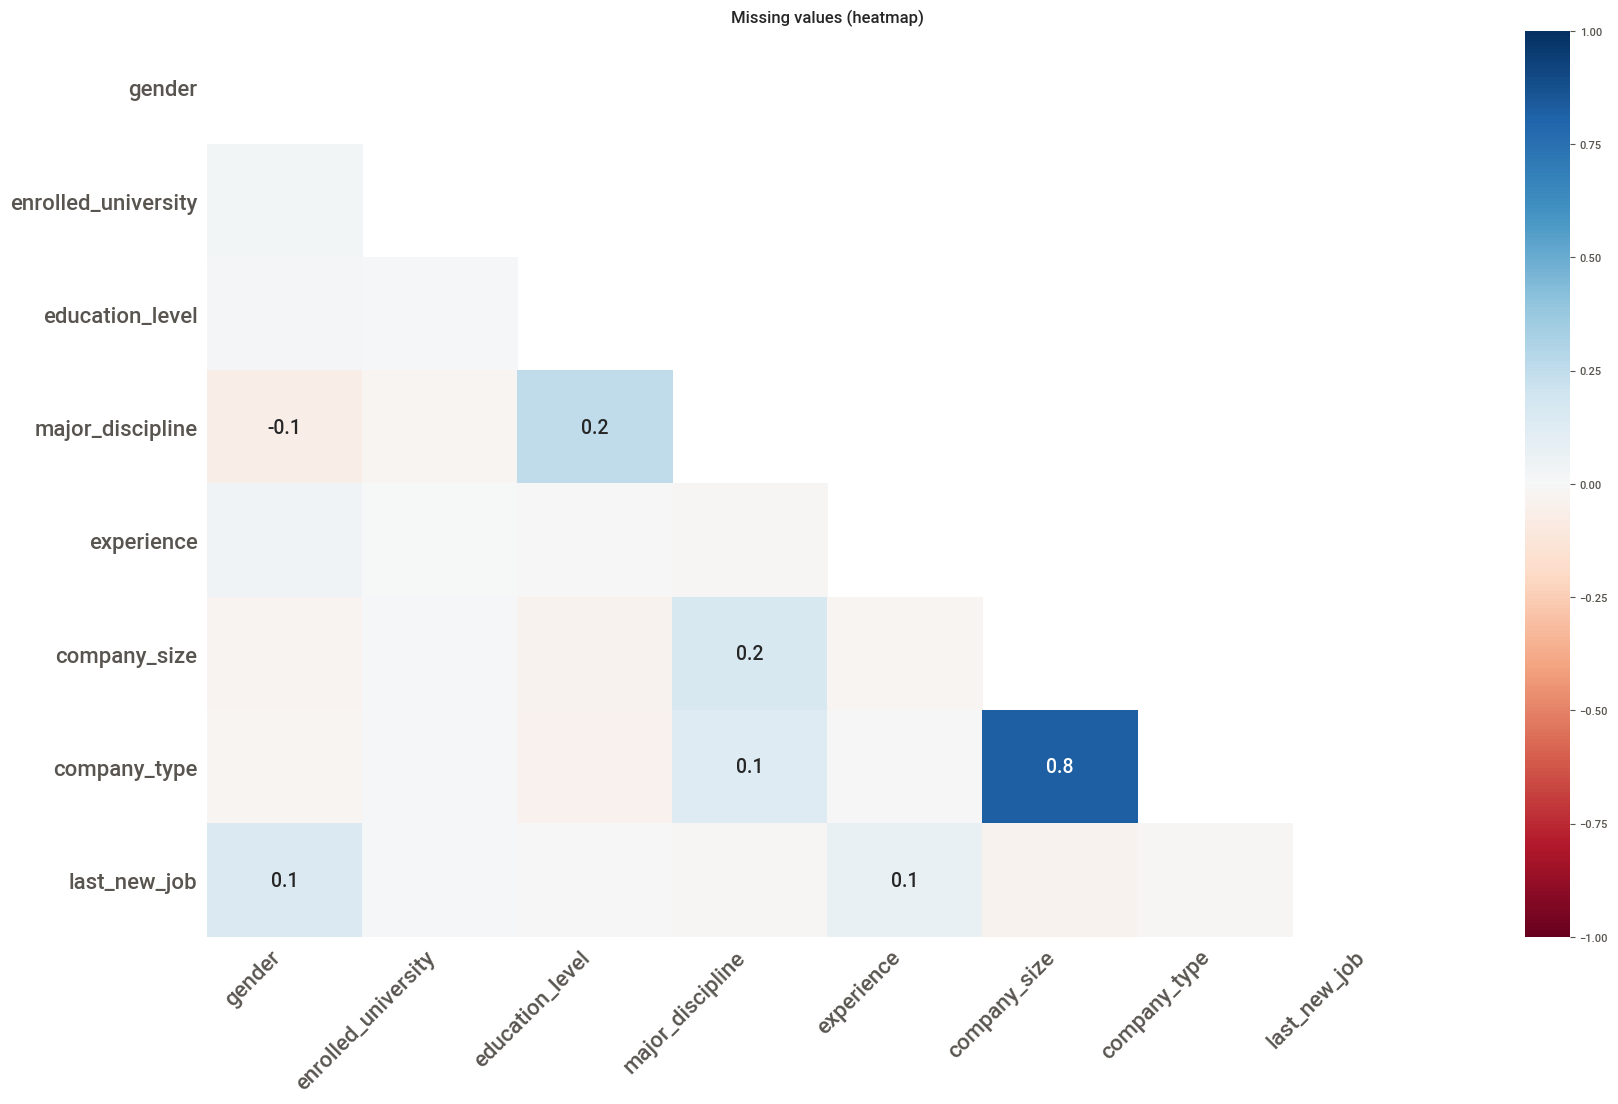

In [32]:
vis_missing(df)

### Gender Column

In [33]:
def categorize_gender(dataframe):
    map = {
      'Male': 0,
      'Other': 1,
      'Female': 2
    }
    
    dataframe.gender.replace(map, inplace=True)
    dataframe['gender'] = dataframe.gender.astype('category')

In [34]:
def impute_gender(dataframe):
    # Filling with most frequent value
    dataframe['gender'] = dataframe['gender'].fillna(dataframe.gender.describe().top)
    print("Missing values after filling:", dataframe.gender.isnull().sum())

Value counts
-------------
Male      13043
Female     1231
Other       182
Name: gender, dtype: int64
-------------
Missing values
---------------
The percent of missing values: 20.9%
Total missing values: 3824
-------------
Statistical info
----------------
count     14456
unique        3
top        Male
freq      13043
Name: gender, dtype: object
----------------


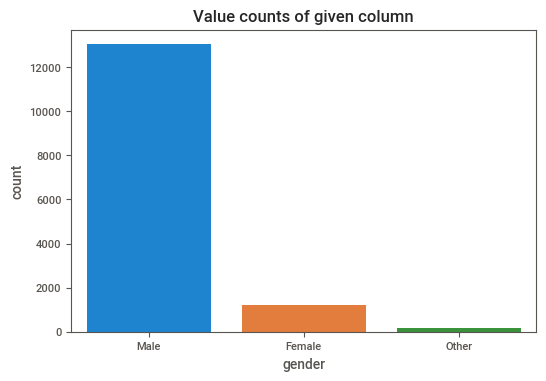

In [35]:
column_info(df.gender)

In [36]:
categorize_gender(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18280 entries, 0 to 19156
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   enrollee_id             18280 non-null  int64   
 1   city                    18280 non-null  object  
 2   city_development_index  18280 non-null  float64 
 3   gender                  14456 non-null  category
 4   relevent_experience     18280 non-null  object  
 5   enrolled_university     18076 non-null  object  
 6   education_level         18133 non-null  object  
 7   major_discipline        16216 non-null  object  
 8   experience              18247 non-null  object  
 9   company_size            13185 non-null  object  
 10  company_type            12990 non-null  object  
 11  last_new_job            18052 non-null  object  
 12  training_hours          18280 non-null  int64   
 13  target                  18280 non-null  float64 
dtypes: category(1), float6

In [37]:
impute_gender(df)

Missing values after filling: 0


In [38]:
df.gender.isnull().sum()

0

### Last New Job Column

In [39]:
def categorize_last_new_job(dataframe):
    map = {
      'never': 0,
      '1': 1,
      '2': 2,
      '3': 3,
      '4': 4,
      '>4': 5,
    }
    dataframe.last_new_job.replace(map, inplace=True)
    dataframe['last_new_job'] = dataframe.last_new_job.astype('category')

In [40]:
def impute_last_new_job(dataframe, method):
    if method == 'mode':
        dataframe['last_new_job'] = dataframe['last_new_job'].fillna(dataframe.last_new_job.describe().top)
    elif method == 'drop':
        dataframe.dropna(subset=['last_new_job'], inplace=True)
    else:
        print('Please enter a valid method.')
        print("Missing values after filling:", dataframe.last_new_job.isnull().sum())

Value counts
-------------
1        7868
>4       3256
2        2856
never    2038
4        1020
3        1014
Name: last_new_job, dtype: int64
-------------
Missing values
---------------
The percent of missing values: 1.2%
Total missing values: 228
-------------
Statistical info
----------------
count     18052
unique        6
top           1
freq       7868
Name: last_new_job, dtype: object
----------------


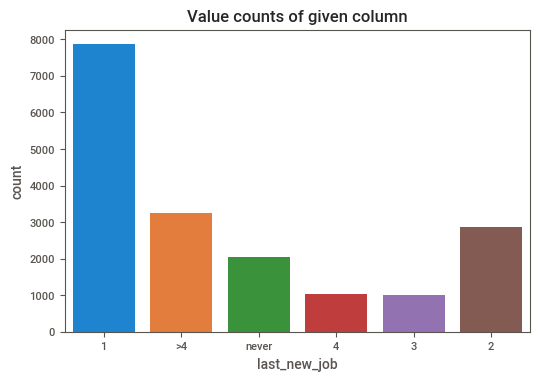

In [41]:
column_info(df.last_new_job)

In [42]:
null_info(df, 'last_new_job', 'target')

0.0    148
1.0     80
Name: target, dtype: int64


In [43]:
categorize_last_new_job(df)

In [44]:
impute_last_new_job(df, method='mode')

### Relevant Experience Column


In [45]:
def categorize_relevent_experience(dataframe):
    map = {'Has relevent experience': 1,
           'No relevent experience': 0
          }
    
    dataframe.relevent_experience.replace(map, inplace=True)
    dataframe['relevent_experience'] = dataframe.relevent_experience.astype('category')

In [46]:
df.relevent_experience

0        Has relevent experience
1         No relevent experience
2         No relevent experience
3         No relevent experience
4        Has relevent experience
                  ...           
19152    Has relevent experience
19153     No relevent experience
19154    Has relevent experience
19155    Has relevent experience
19156    Has relevent experience
Name: relevent_experience, Length: 18280, dtype: object

In [47]:
categorize_relevent_experience(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18280 entries, 0 to 19156
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   enrollee_id             18280 non-null  int64   
 1   city                    18280 non-null  object  
 2   city_development_index  18280 non-null  float64 
 3   gender                  18280 non-null  category
 4   relevent_experience     18280 non-null  category
 5   enrolled_university     18076 non-null  object  
 6   education_level         18133 non-null  object  
 7   major_discipline        16216 non-null  object  
 8   experience              18247 non-null  object  
 9   company_size            13185 non-null  object  
 10  company_type            12990 non-null  object  
 11  last_new_job            18280 non-null  category
 12  training_hours          18280 non-null  int64   
 13  target                  18280 non-null  float64 
dtypes: category(3), float6

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18280 entries, 0 to 19156
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   enrollee_id             18280 non-null  int64   
 1   city                    18280 non-null  object  
 2   city_development_index  18280 non-null  float64 
 3   gender                  18280 non-null  category
 4   relevent_experience     18280 non-null  category
 5   enrolled_university     18076 non-null  object  
 6   education_level         18133 non-null  object  
 7   major_discipline        16216 non-null  object  
 8   experience              18247 non-null  object  
 9   company_size            13185 non-null  object  
 10  company_type            12990 non-null  object  
 11  last_new_job            18280 non-null  category
 12  training_hours          18280 non-null  int64   
 13  target                  18280 non-null  float64 
dtypes: category(3), float6

In [49]:
null_info(df, 'relevent_experience', 'target')

Series([], Name: target, dtype: int64)


### Experience Column -- Needs encoding

In [50]:
def impute_experience(dataframe, le=False):
    dataframe.dropna(subset=['experience'], inplace=True)
    print("Missing values after dropping:", dataframe.experience.isnull().sum())
    if le:
        le = LabelEncoder()
        dataframe.experience = le.fit_transform(dataframe.experience.astype(str))

Value counts
-------------
>20    3241
5      1357
4      1313
3      1227
6      1162
7       997
2       983
10      974
9       949
8       782
15      679
11      656
14      581
16      499
12      485
1       475
<1      431
13      395
17      340
19      301
18      275
20      145
Name: experience, dtype: int64
-------------
Missing values
---------------
The percent of missing values: 0.2%
Total missing values: 33
-------------
Statistical info
----------------
count     18247
unique       22
top         >20
freq       3241
Name: experience, dtype: object
----------------


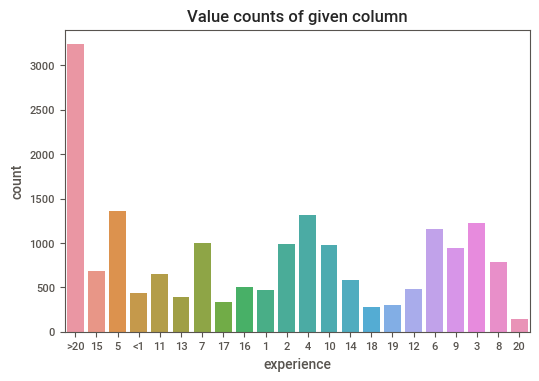

In [51]:
column_info(df.experience)

In [52]:
null_info(df, 'experience', 'target')

0.0    21
1.0    12
Name: target, dtype: int64


In [53]:
impute_experience(df, le=True)

Missing values after dropping: 0


In [54]:
df.experience

0        21
1         6
2        15
3        20
4        21
         ..
19152    17
19153     5
19154     5
19155    21
19156    20
Name: experience, Length: 18247, dtype: int32

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18247 entries, 0 to 19156
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   enrollee_id             18247 non-null  int64   
 1   city                    18247 non-null  object  
 2   city_development_index  18247 non-null  float64 
 3   gender                  18247 non-null  category
 4   relevent_experience     18247 non-null  category
 5   enrolled_university     18044 non-null  object  
 6   education_level         18100 non-null  object  
 7   major_discipline        16183 non-null  object  
 8   experience              18247 non-null  int32   
 9   company_size            13155 non-null  object  
 10  company_type            12965 non-null  object  
 11  last_new_job            18247 non-null  category
 12  training_hours          18247 non-null  int64   
 13  target                  18247 non-null  float64 
dtypes: category(3), float6

### Enrolled University Column

In [56]:
def categorize_enrolled_university(dataframe):
    map = {
      'no_enrollment': 0,
      'Full time course': 1,
      'Part time course': 2
      }
    dataframe.enrolled_university.replace(map, inplace=True)
    dataframe['enrolled_university'] = dataframe.enrolled_university.astype('category')

In [57]:
def impute_enrolled_university(dataframe, method):
    if method == 'mode':
        dataframe['enrolled_university'] = dataframe['enrolled_university'].fillna(dataframe.enrolled_university.describe().top)  
    elif method == 'drop':
        dataframe.dropna(subset=['enrolled_university'], inplace=True)
    else:
        print('Please enter a valid method.')
        print("Missing values after filling:", dataframe.enrolled_university.isnull().sum())


Value counts
-------------
no_enrollment       13400
Full time course     3481
Part time course     1163
Name: enrolled_university, dtype: int64
-------------
Missing values
---------------
The percent of missing values: 1.1%
Total missing values: 203
-------------
Statistical info
----------------
count             18044
unique                3
top       no_enrollment
freq              13400
Name: enrolled_university, dtype: object
----------------


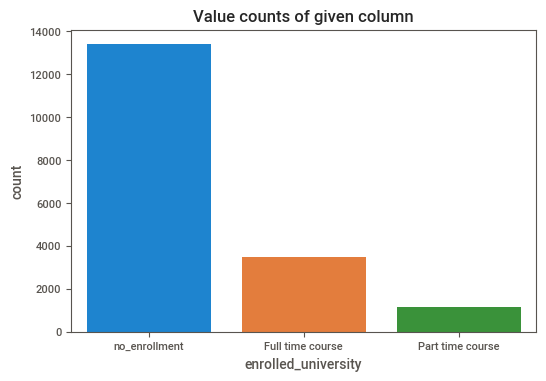

In [58]:
column_info(df.enrolled_university)

In [59]:
null_info(df, 'enrolled_university', 'target')

0.0    126
1.0     77
Name: target, dtype: int64


In [60]:
categorize_enrolled_university(df)

In [61]:
impute_enrolled_university(df, method='drop')

### Education Level and Major Columns

In [62]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,0.0,1,0.0,Graduate,STEM,21,NaN,NaN,1.0,36,1.0
1,29725,city_40,0.776,0.0,0,0.0,Graduate,STEM,6,50-99,Pvt Ltd,5.0,47,0.0
2,11561,city_21,0.624,0.0,0,1.0,Graduate,STEM,15,NaN,NaN,0.0,83,0.0
4,666,city_162,0.767,0.0,1,0.0,Masters,STEM,21,50-99,Funded Startup,4.0,8,0.0
5,21651,city_176,0.764,0.0,1,2.0,Graduate,STEM,2,NaN,NaN,1.0,24,1.0


Value counts
-------------
Graduate          11324
Masters            4280
High School        1661
Phd                 404
Primary School      231
Name: education_level, dtype: int64
-------------
Missing values
---------------
The percent of missing values: 0.8%
Total missing values: 144
-------------
Statistical info
----------------
count        17900
unique           5
top       Graduate
freq         11324
Name: education_level, dtype: object
----------------


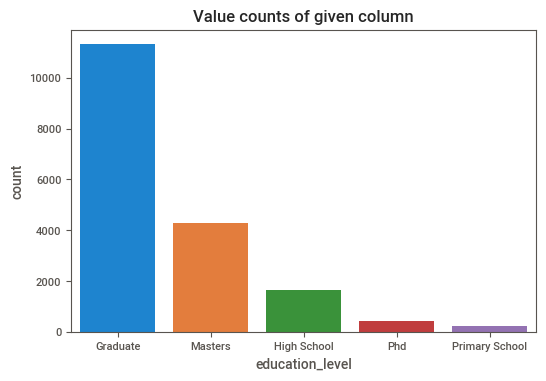

In [63]:
column_info(df.education_level)

### Hypothesis: 
###### ->If a person's education_level equals to High School degree, that person can not have major_discipline
###### ->if education_level == High School and enrolled_university == 0 then major_discipline == No Major
###### ->if education == High School and enrolled_university != 0 then major_discipline == other

In [64]:
trio_df = df[['education_level', 'major_discipline', 'enrolled_university', 'target']]
print(trio_df[trio_df['education_level'] == 'High School'].isnull().sum())
print(trio_df[trio_df['education_level'] == 'High School'])

education_level           0
major_discipline       1661
enrolled_university       0
target                    0
dtype: int64
      education_level major_discipline enrolled_university  target
6         High School              NaN                 0.0     0.0
28        High School              NaN                 0.0     1.0
36        High School              NaN                 2.0     0.0
41        High School              NaN                 0.0     0.0
54        High School              NaN                 1.0     0.0
...               ...              ...                 ...     ...
19101     High School              NaN                 0.0     0.0
19102     High School              NaN                 1.0     0.0
19123     High School              NaN                 0.0     0.0
19134     High School              NaN                 2.0     0.0
19156     High School              NaN                 0.0     0.0

[1661 rows x 4 columns]


### Hypothesis: 
###### ->If a person's education_level equals to Primary School degree, that person can not have major_discipline
###### ->If education_level == Primary School and enrolled_university == 0 then major_discipline == No major
###### ->If education == Primary School and enrolled_university != 0 then major_discipline == other

In [65]:
print(trio_df[trio_df['education_level'] == 'Primary School'].isnull().sum())
print(trio_df[trio_df['education_level'] == 'Primary School'])
trio_primary = trio_df[trio_df['education_level'] == 'Primary School']
print(trio_primary[trio_primary['enrolled_university'] != 0].target.value_counts())

education_level          0
major_discipline       231
enrolled_university      0
target                   0
dtype: int64
      education_level major_discipline enrolled_university  target
213    Primary School              NaN                 0.0     0.0
271    Primary School              NaN                 0.0     0.0
315    Primary School              NaN                 0.0     0.0
316    Primary School              NaN                 0.0     0.0
351    Primary School              NaN                 0.0     0.0
...               ...              ...                 ...     ...
18620  Primary School              NaN                 0.0     0.0
18820  Primary School              NaN                 0.0     0.0
18920  Primary School              NaN                 0.0     0.0
19015  Primary School              NaN                 0.0     0.0
19027  Primary School              NaN                 0.0     0.0

[231 rows x 4 columns]
0.0    25
1.0     9
Name: target, dtype: int64


In [66]:
null_info(df, 'education_level', 'target')

0.0    114
1.0     30
Name: target, dtype: int64


In [67]:
def impute_education_level(dataframe, method):
    if method == 'mode':
        dataframe['education_level'] = dataframe['education_level'].fillna(dataframe.education_level.describe().top)
    elif method == 'drop':
        dataframe.dropna(subset=['education_level'], inplace=True)

In [68]:
def categorize_education_level(dataframe):
    map = {
      'Do not have one': 0,
      'Other': 1,
      'Primary School': 2,
      'High School': 3,
      'Graduate': 4,
      'Masters': 5,
      'Phd': 6
    }
    dataframe.education_level.replace(map, inplace=True)
    dataframe['education_level'] = dataframe.education_level.astype('category')

In [69]:
## use groupby's

In [70]:
def impute_major_discipline(dataframe):
    print('Before imputing:')
    print(dataframe.major_discipline.value_counts())
    # High school
    dataframe.major_discipline[(dataframe.education_level == 'High school') & (dataframe.enrolled_university == 0)] = 'No Major'
    dataframe.major_discipline[(dataframe.education_level == 'High School') & (dataframe.enrolled_university == 0)] = 'No Major'
    dataframe.major_discipline[(dataframe.education_level == 'High school') & (dataframe.enrolled_university != 0)] = 'Other'
    dataframe.major_discipline[(dataframe.education_level == 'High School') & (dataframe.enrolled_university != 0)] = 'Other'
    
    # Primary School
    dataframe.major_discipline[(dataframe.education_level == 'Primary school') & (dataframe.enrolled_university == 0)] = 'No Major'
    dataframe.major_discipline[(dataframe.education_level == 'Primary School') & (dataframe.enrolled_university == 0)] = 'No Major'
    dataframe.major_discipline[(dataframe.education_level == 'Primary school') & (dataframe.enrolled_university != 0)] = 'Other'
    dataframe.major_discipline[(dataframe.education_level == 'Primary School') & (dataframe.enrolled_university != 0)] = 'Other'
    
    # Drop NaN
    dataframe.dropna(subset=['major_discipline'], inplace=True)
    
    # Categorize
    map = {
        'STEM': 0,
        'Other': 1,
        'No Major': 2,
        'Humanities': 3,
        'Business Degree': 4,
        'Arts': 5
    }
    
    dataframe.major_discipline.replace(map, inplace=True)
    
    print("-------")
    print('After imputing:')
    print(dataframe.major_discipline.value_counts())

In [71]:
impute_major_discipline(df)
categorize_education_level(df)

Before imputing:
STEM               14170
Humanities           657
Other                373
Business Degree      324
Arts                 249
No Major             218
Name: major_discipline, dtype: int64
-------
After imputing:
0    14170
1     1261
2     1222
3      657
4      324
5      249
Name: major_discipline, dtype: int64


<ipython-input-70-88dcaf697f6e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.major_discipline[(dataframe.education_level == 'High school') & (dataframe.enrolled_university == 0)] = 'No Major'
<ipython-input-70-88dcaf697f6e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.major_discipline[(dataframe.education_level == 'High School') & (dataframe.enrolled_university == 0)] = 'No Major'
<ipython-input-70-88dcaf697f6e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

In [72]:
df.education_level.isnull().sum()

0

In [73]:
df.target.value_counts()

0.0    13489
1.0     4394
Name: target, dtype: int64

In [74]:
impute_education_level(df, method='drop')

In [75]:
df.education_level.isnull().sum()

0

In [76]:
df.target.value_counts()

0.0    13489
1.0     4394
Name: target, dtype: int64

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17883 entries, 0 to 19156
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   enrollee_id             17883 non-null  int64   
 1   city                    17883 non-null  object  
 2   city_development_index  17883 non-null  float64 
 3   gender                  17883 non-null  category
 4   relevent_experience     17883 non-null  category
 5   enrolled_university     17883 non-null  category
 6   education_level         17883 non-null  category
 7   major_discipline        17883 non-null  int64   
 8   experience              17883 non-null  int32   
 9   company_size            12872 non-null  object  
 10  company_type            12685 non-null  object  
 11  last_new_job            17883 non-null  category
 12  training_hours          17883 non-null  int64   
 13  target                  17883 non-null  float64 
dtypes: category(5), float6

### Company Type Column

In [78]:
def categorize_company_type(dataframe):
    map = {
        'Pvt Ltd': 0,
        'Funded Startup': 1,
        'Public Sector': 2,
        'Early Stage Startup': 3,
        'NGO': 4,
        'Other': 5
    }
    
    dataframe.company_type.replace(map, inplace=True)

Value counts
-------------
Pvt Ltd                9569
Funded Startup          984
Public Sector           928
Early Stage Startup     578
NGO                     508
Other                   118
Name: company_type, dtype: int64
-------------
Missing values
---------------
The percent of missing values: 29.1%
Total missing values: 5198
-------------
Statistical info
----------------
count       12685
unique          6
top       Pvt Ltd
freq         9569
Name: company_type, dtype: object
----------------


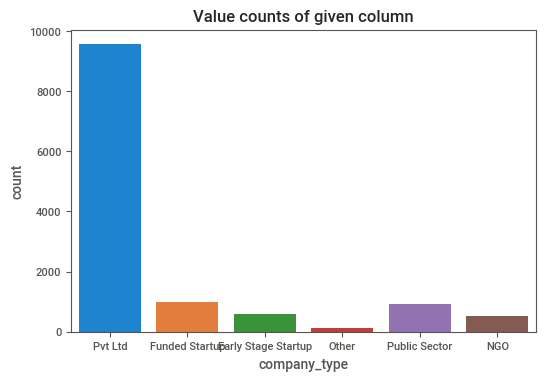

In [79]:
column_info(df.company_type)

In [80]:
df[df.company_type.isnull()].target.value_counts()

0.0    3101
1.0    2097
Name: target, dtype: int64

In [81]:
features_ctype = list(df.columns)
ctype_remove = ['company_size', 'company_type', 'city', 'target', 'enrollee_id']
for feature in ctype_remove:
  features_ctype.remove(feature)
features_ctype

['city_development_index',
 'gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'last_new_job',
 'training_hours']

In [82]:
def predict_company_type(dataframe, feature_list, classifier, fill = False):
    mask = dataframe.company_type.isnull()
    y = dataframe[~mask].company_type
    X = dataframe[~mask][feature_list]
    
    X_train, X_test, y_train, y_test = tts(X, y, random_state=42, stratify=y, test_size=0.3)
    
    X_real = dataframe[mask][feature_list]
    
    classifier.fit(X_train, y_train)
    y_pred_test = classifier.predict(X_test)
    print(accuracy_score(y_test, y_pred_test))
    
    if fill:
        y_pred_real = classifier.predict(X_real)
        dataframe.loc[mask, 'company_type'] = y_pred_real
        categorize_company_type(df)

In [83]:
knn_company_type = KNeighborsClassifier(n_neighbors=20)
knn_company_type_grid = GridSearchCV(knn_company_type, {'n_neighbors': [20, 25],
                                              'leaf_size': [30, 60]})

In [84]:
predict_company_type(df, features_ctype, knn_company_type_grid, fill=True)

0.7543352601156069


In [85]:
knn_company_type_grid.best_params_

{'leaf_size': 30, 'n_neighbors': 20}

In [86]:
df.company_type

0        0
1        0
2        0
4        1
5        0
        ..
19152    1
19153    0
19154    0
19155    0
19156    0
Name: company_type, Length: 17883, dtype: int64

### Company Size Column

In [87]:
def predict_company_size(dataframe, feature_list, classifier, fill = False):
    mask = dataframe.company_size.isnull()
    y = dataframe[~mask].company_size
    X = dataframe[~mask][feature_list]
    
    X_train, X_test, y_train, y_test = tts(X, y, random_state=42, stratify=y, test_size=0.3)
    
    X_real = dataframe[mask][feature_list]
    
    classifier.fit(X_train, y_train)
    y_pred_test = classifier.predict(X_test)
    print(accuracy_score(y_test, y_pred_test))
    
    if fill:
        y_pred_real = classifier.predict(X_real)
        dataframe.loc[mask, 'company_size'] = y_pred_real

In [88]:
features_csize = list(df.columns)
csize_remove = ['company_size', 'company_type', 'city', 'target', 'enrollee_id']
for feature in csize_remove:
  features_csize.remove(feature)
  
features_csize

['city_development_index',
 'gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'last_new_job',
 'training_hours']

In [89]:
knn_company_size = KNeighborsClassifier()
knn_company_size_grid = GridSearchCV(knn_company_size, {'n_neighbors': [20, 25],
                                              'leaf_size': [30, 60]})

In [90]:
predict_company_size(df, features_csize, knn_company_size_grid, fill=False)

0.20041429311237702


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17883 entries, 0 to 19156
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   enrollee_id             17883 non-null  int64   
 1   city                    17883 non-null  object  
 2   city_development_index  17883 non-null  float64 
 3   gender                  17883 non-null  category
 4   relevent_experience     17883 non-null  category
 5   enrolled_university     17883 non-null  category
 6   education_level         17883 non-null  category
 7   major_discipline        17883 non-null  int64   
 8   experience              17883 non-null  int32   
 9   company_size            12872 non-null  object  
 10  company_type            17883 non-null  int64   
 11  last_new_job            17883 non-null  category
 12  training_hours          17883 non-null  int64   
 13  target                  17883 non-null  float64 
dtypes: category(5), float6

## Correlation between columns

<AxesSubplot:>

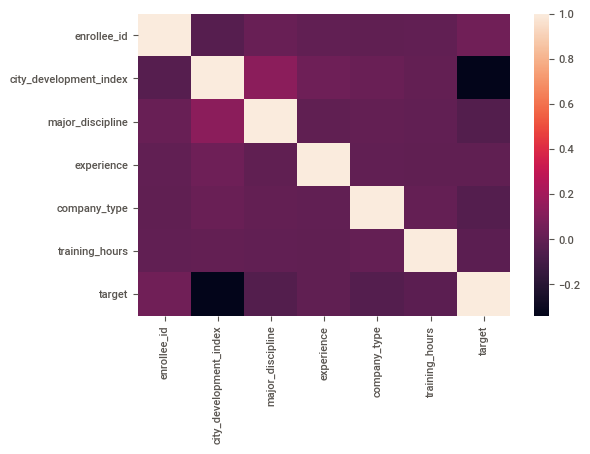

In [92]:
sns.heatmap(df.corr())

In [93]:
df.corr()

,enrollee_id,city_development_index,major_discipline,experience,company_type,training_hours,target
enrollee_id,1.000000,-0.037221,0.017830,-0.001658,-0.009131,-0.000807,0.048027
city_development_index,-0.037221,1.000000,0.131715,0.038026,0.026965,0.005646,-0.338793
major_discipline,0.017830,0.131715,1.000000,-0.004509,0.003183,-0.001433,-0.047650
experience,-0.001658,0.038026,-0.004509,1.000000,0.000009,-0.005174,-0.007920
company_type,-0.009131,0.026965,0.003183,0.000009,1.000000,0.007730,-0.043064
training_hours,-0.000807,0.005646,-0.001433,-0.005174,0.007730,1.000000,-0.024449
target,0.048027,-0.338793,-0.047650,-0.007920,-0.043064,-0.024449,1.000000


### Sampling

In [94]:
# Select minority and majority
df_majority = df[df.target==0]
df_minority = df[df.target==1]

df_minority_upsampled = resample(df_minority,
                                   replace=True,
                                   n_samples = df.target.value_counts()[0],
                                   random_state=46)

df_majority_downsampled = resample(df_majority,
                                   replace=False,
                                   n_samples = df.target.value_counts()[1],
                                   random_state=46)

assert df_minority.shape == df_majority_downsampled.shape
assert df_majority.shape == df_minority_upsampled.shape

df_balanced_ds = pd.concat([df_minority, df_majority_downsampled])
df_balanced_us = pd.concat([df_majority, df_minority_upsampled])
df_balanced_us.to_csv('hr_data/upsampled_clean.csv')

### TTS

In [95]:
# Select features for the X
feature_list = list(df.columns)
remove_list = ['target', 'city', 'company_size', 'company_type','enrollee_id']  # Company type?!
for feature in remove_list:
  feature_list.remove(feature)

# Downsampled
X_ds = df_balanced_ds[feature_list]
y_ds = df_balanced_ds['target']

X_ds_train, X_ds_test, y_ds_train, y_ds_test = tts(X_ds, y_ds, random_state=42, test_size=0.3, stratify=y_ds)


# Upsampled
X_us = df_balanced_us[feature_list]
y_us = df_balanced_us['target']

X_us_train, X_us_test, y_us_train, y_us_test = tts(X_us, y_us, random_state=42, test_size=0.3, stratify=y_us)
features = {'feature_list': feature_list,
            'target': 'target'}

with open('features.json', 'w+') as outfile:
  json.dump(features, outfile)

# MODELS

### KNN

In [96]:
KNN = KNeighborsClassifier()

KNN_grid = {
    'n_neighbors': [x for x in range(1, 50, 3)],
    'leaf_size': [1, 15, 30]  
}

KNN_CV = GridSearchCV(KNN, KNN_grid)

##### Downsampled

In [97]:
KNN_CV.fit(X_ds_train, y_ds_train)
y_ds_pred_KNN = KNN_CV.predict(X_ds_test)

In [98]:
acc_ds_KNN = accuracy_score(y_ds_test, y_ds_pred_KNN) * 100
print('Accuracy of KNN: {}%'.format(acc_ds_KNN))

Accuracy of KNN: 56.95866514979143%


In [99]:
KNN_CV.best_params_

{'leaf_size': 30, 'n_neighbors': 34}

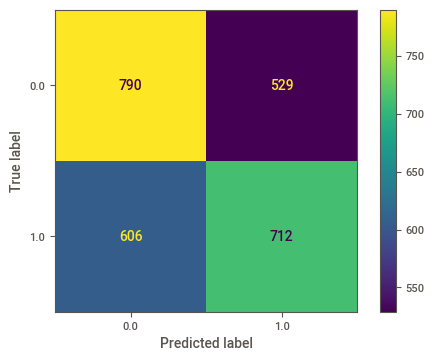

In [100]:
plot_confusion_matrix(KNN_CV, X_ds_test, y_ds_test, values_format='.7g')

In [101]:
roc_auc_score(y_ds_test, y_ds_pred_KNN) * 100

56.95755164681938

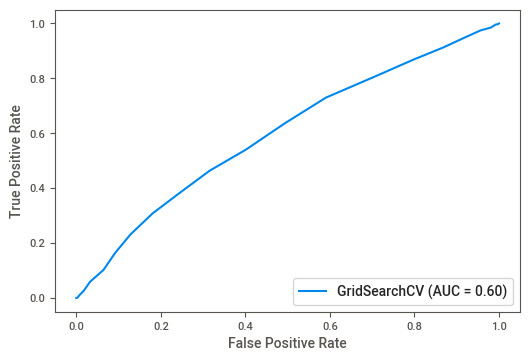

In [102]:
plot_roc_curve(KNN_CV, X_ds_test, y_ds_test)

##### Upsampled

In [103]:
KNN_CV.fit(X_us_train, y_us_train)
y_us_pred_KNN = KNN_CV.predict(X_us_test)

In [104]:
acc_us_KNN = accuracy_score(y_us_test, y_us_pred_KNN) * 100
print('Accuracy of KNN: {}%'.format(acc_us_KNN))

Accuracy of KNN: 82.80207561156412%


In [105]:
KNN_CV.best_params_

{'leaf_size': 30, 'n_neighbors': 1}

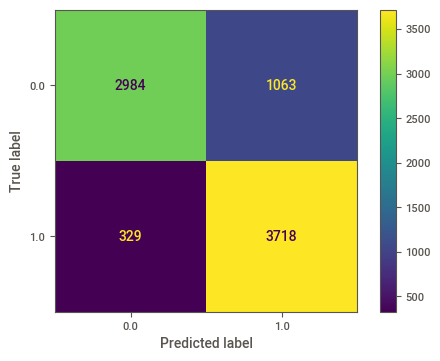

In [106]:
plot_confusion_matrix(KNN_CV, X_us_test, y_us_test, values_format='.7g')

In [107]:
roc_auc_score(y_us_test, y_us_pred_KNN) * 100

82.80207561156412

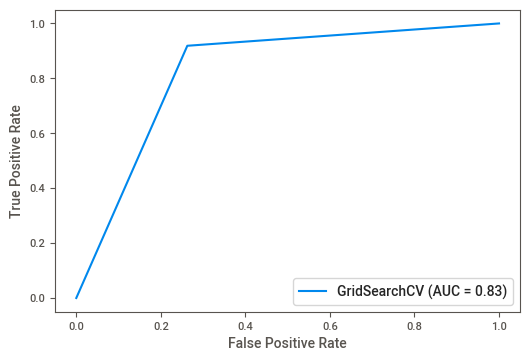

In [108]:
plot_roc_curve(KNN_CV, X_us_test, y_us_test)

### Logistic Regression

In [109]:
LogReg = LogisticRegression(C=1)

##### Downsampled

In [110]:
LogReg.fit(X_ds_train, y_ds_train)
y_ds_pred_LogReg = LogReg.predict(X_ds_test)

C:\Users\erenx\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [111]:
acc_ds_LogReg = accuracy_score(y_ds_test, y_ds_pred_LogReg) * 100
print('Accuracy of Logistic Regression: {}%'.format(acc_ds_LogReg))

Accuracy of Logistic Regression: 65.64277588168373%


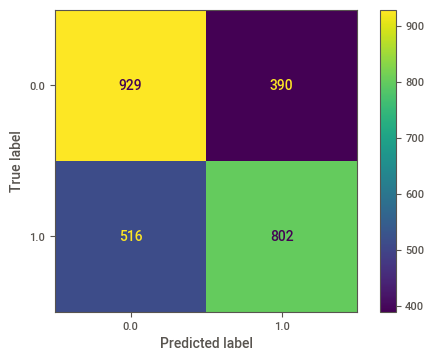

In [112]:
plot_confusion_matrix(LogReg, X_ds_test, y_ds_test, values_format='0.7g')

In [113]:
roc_auc_score(y_ds_test, y_ds_pred_LogReg) * 100

65.64095897360971

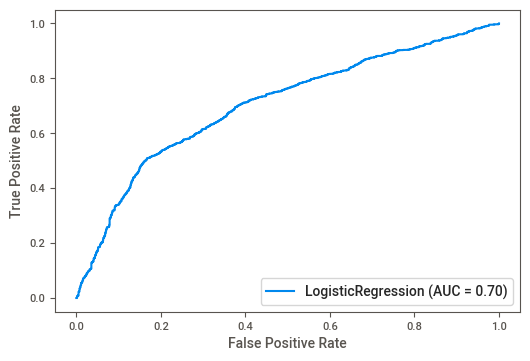

In [114]:
plot_roc_curve(LogReg, X_ds_test, y_ds_test)

##### Upsampled

In [115]:
LogReg.fit(X_us_train, y_us_train)
y_us_pred_LogReg = LogReg.predict(X_us_test)

C:\Users\erenx\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [116]:
acc_us_LogReg = accuracy_score(y_us_test, y_us_pred_LogReg) * 100
print('Accuracy of Logistic Regression: {}%'.format(acc_us_LogReg))

Accuracy of Logistic Regression: 66.5554731900173%


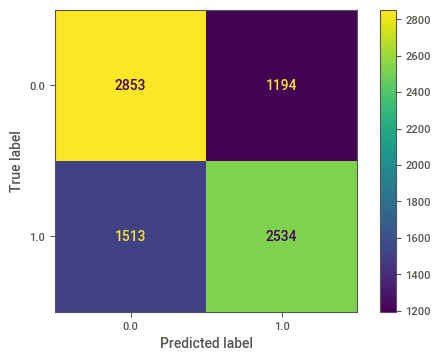

In [117]:
plot_confusion_matrix(LogReg, X_us_test, y_us_test, values_format='0.7g')

In [118]:
roc_auc_score(y_us_test, y_us_pred_LogReg) * 100

66.5554731900173

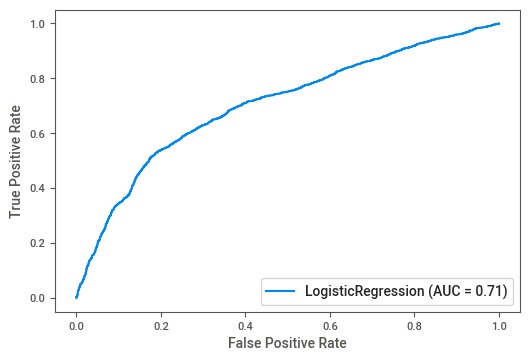

In [119]:
plot_roc_curve(LogReg, X_us_test, y_us_test)

### SVC

In [120]:
SVM = SVC(kernel='rbf')
SVM_grid = {'C': [c for c in range(1, 20, 5)]}
SVM_CV = GridSearchCV(SVM, SVM_grid)
best_parameters = []

##### Downsampled

In [121]:
SVM_CV.fit(X_ds_train, y_ds_train)
y_ds_pred_SVM = SVM_CV.predict(X_ds_test)

In [122]:
acc_ds_SVM = accuracy_score(y_ds_test, y_ds_pred_SVM) * 100
print('Accuracy of Support Vector Classifier: {}%'.format(acc_ds_SVM))

Accuracy of Support Vector Classifier: 61.24383769434964%


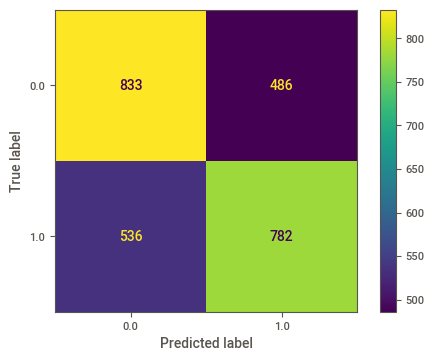

In [123]:
plot_confusion_matrix(SVM_CV, X_ds_test, y_ds_test, values_format='0.7g')

In [124]:
roc_auc_score(y_ds_test, y_ds_pred_SVM) * 100

61.24311308631521

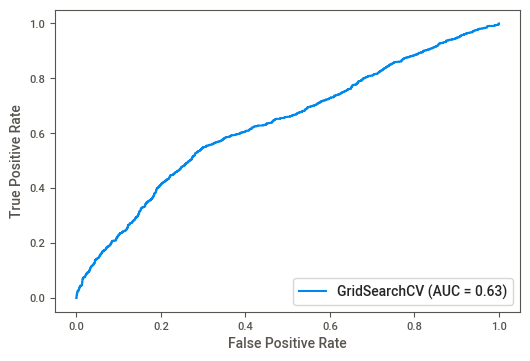

In [125]:
plot_roc_curve(SVM_CV, X_ds_test, y_ds_test)

##### Upsampled

In [126]:
SVM_CV.fit(X_us_train, y_us_train)
y_us_pred_SVM = SVM_CV.predict(X_us_test)

In [127]:
acc_us_SVM = accuracy_score(y_us_test, y_us_pred_SVM) * 100
print('Accuracy of Support Vector Classifier: {}%'.format(acc_us_SVM))

Accuracy of Support Vector Classifier: 62.20657276995305%


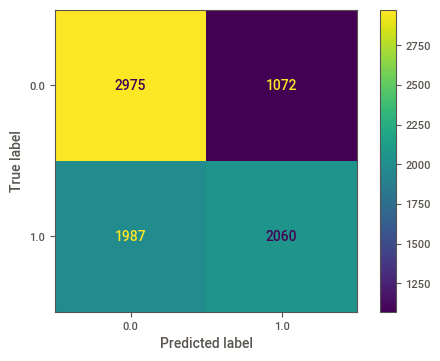

In [128]:
plot_confusion_matrix(SVM_CV, X_us_test, y_us_test, values_format='0.7g')

In [129]:
roc_auc_score(y_us_test, y_us_pred_SVM) * 100

62.20657276995305

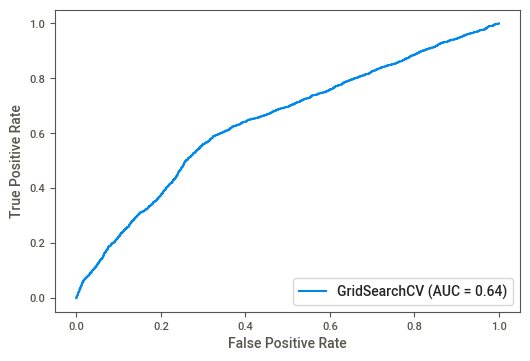

In [130]:
plot_roc_curve(SVM_CV, X_us_test, y_us_test)

### Decision Tree

In [131]:
dtc = DecisionTreeClassifier()
dtc_grid = {'criterion': ['gini', 'entropy'],
            'max_depth': [x for x in range(1, 25)] + [None],
            'min_samples_split': [2,3,4,5,6,7]}
dtc_CV = GridSearchCV(dtc, dtc_grid)

#### Downsampled

In [132]:
dtc_CV.fit(X_ds_train, y_ds_train)
y_ds_pred_DT = dtc_CV.predict(X_ds_test)

In [133]:
acc_ds_DT = accuracy_score(y_ds_test, y_ds_pred_DT) * 100
print('Accuracy of Decision Tree Classifier: {}%'.format(acc_ds_DT))

Accuracy of Decision Tree Classifier: 69.39704209328784%


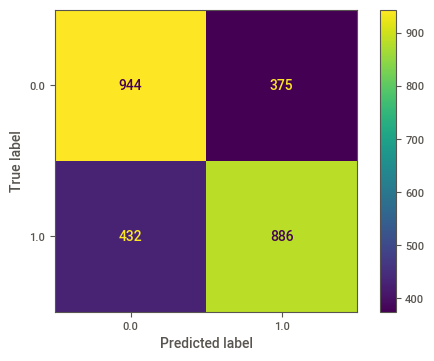

In [134]:
plot_confusion_matrix(dtc_CV, X_ds_test, y_ds_test, values_format='0.7g')

In [135]:
roc_auc_score(y_ds_test, y_ds_pred_DT) * 100

69.39621799289249

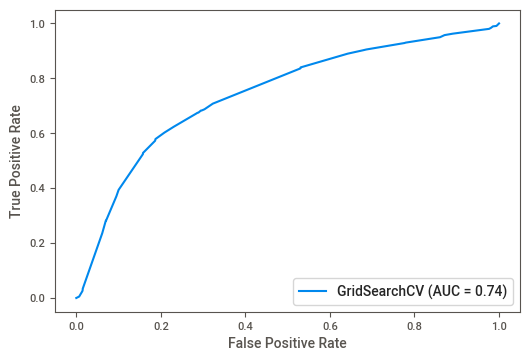

In [136]:
plot_roc_curve(dtc_CV, X_ds_test, y_ds_test)

#### Upsampled

In [137]:
dtc_CV.fit(X_us_train, y_us_train)
y_us_pred_DT = dtc_CV.predict(X_us_test)

In [138]:
acc_us_DT = accuracy_score(y_us_test, y_us_pred_DT) * 100
print('Accuracy of Support Vector Classifier: {}%'.format(acc_us_DT))

Accuracy of Support Vector Classifier: 84.03755868544602%


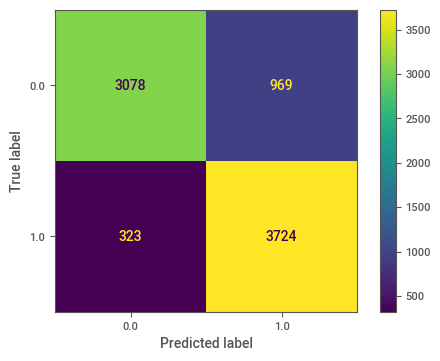

In [139]:
plot_confusion_matrix(dtc_CV, X_us_test, y_us_test, values_format='0.7g')

In [140]:
roc_auc_score(y_us_test, y_us_pred_DT) * 100

84.03755868544602

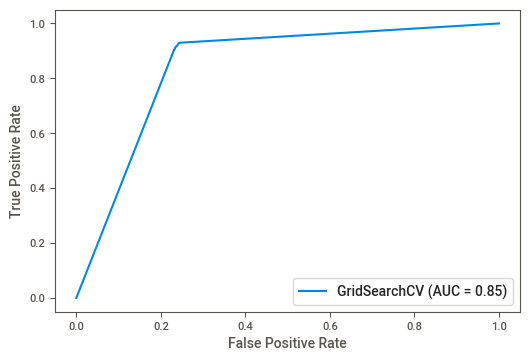

In [141]:
plot_roc_curve(dtc_CV, X_us_test, y_us_test)

### Random Forest

In [142]:
rfc = RandomForestClassifier()
rfc_grid = {'n_estimators': [100, 125, 150, 175, 200, 225, 250], 
              'criterion': ['gini', 'entropy']}
rfc_CV = GridSearchCV(rfc, rfc_grid)

#### Downsampled

In [143]:
rfc_CV.fit(X_ds_train, y_ds_train)
y_ds_pred_RF = rfc_CV.predict(X_ds_test)

In [144]:
acc_ds_RF = accuracy_score(y_ds_test, y_ds_pred_RF) * 100
print('Accuracy of Random Forest Classifier: {}%'.format(acc_ds_RF))

Accuracy of Random Forest Classifier: 67.614713689799%


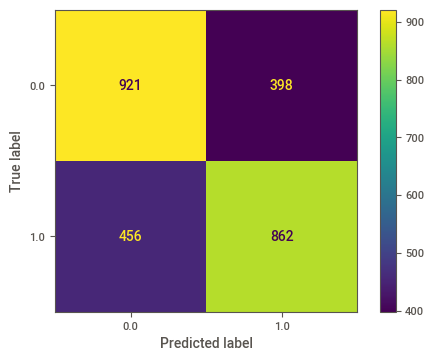

In [145]:
plot_confusion_matrix(rfc_CV, X_ds_test, y_ds_test, values_format='0.7g')

In [146]:
roc_auc_score(y_ds_test, y_ds_pred_RF) * 100

67.6138749523999

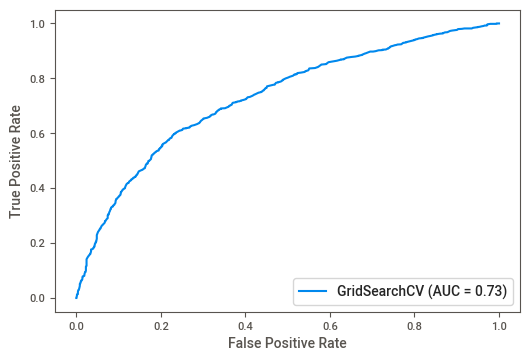

In [147]:
plot_roc_curve(rfc_CV, X_ds_test, y_ds_test)

#### Upsampled

In [148]:
rfc_CV.fit(X_us_train, y_us_train)
y_us_pred_RF = rfc_CV.predict(X_us_test)

In [149]:
# to json
best_params_rf_us = rfc_CV.best_params_
with open('best_params.json', 'w+') as outfile:
  json.dump(best_params_rf_us, outfile)

In [150]:
acc_us_RF = accuracy_score(y_us_test, y_us_pred_RF) * 100
print('Accuracy of Random Forest Classifier: {}%'.format(acc_us_RF))

Accuracy of Random Forest Classifier: 87.24981467753892%


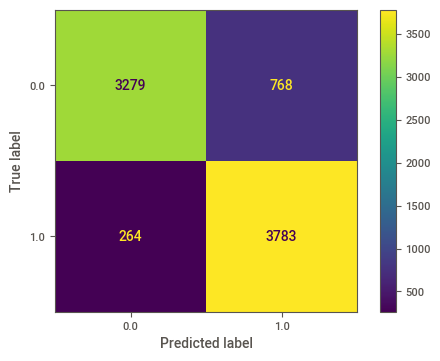

In [151]:
plot_confusion_matrix(rfc_CV, X_us_test, y_us_test, values_format='0.7g')

In [152]:
roc_auc_score(y_us_test, y_us_pred_RF) * 100

87.24981467753892

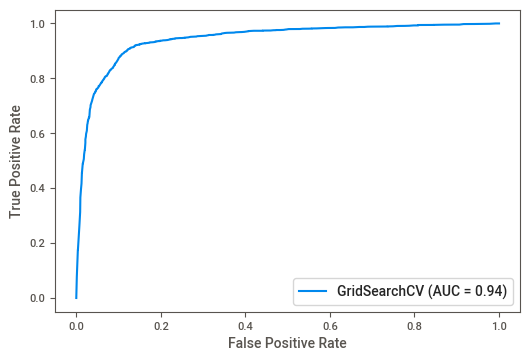

In [153]:
plot_roc_curve(rfc_CV, X_us_test, y_us_test)

##### Classification Report

In [154]:
print(classification_report(y_us_test, y_us_pred_RF))

              precision    recall  f1-score   support

         0.0       0.93      0.81      0.86      4047
         1.0       0.83      0.93      0.88      4047

    accuracy                           0.87      8094
   macro avg       0.88      0.87      0.87      8094
weighted avg       0.88      0.87      0.87      8094

